Data Processing And building machine learning Model
----------------------------------------------------------------------------------

Steps of Preprocessing of data
--------------------------------------------
Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Normalization 
Step 9] - Encoding of Data  

# Financial data (Credit risk assessment for loan approval using borrower's financial history)

Our aim is to develop a model that can predict the credit risk of an individual based on various factors. This is a common application of machine learning, particularly classification problems.



# Step 1: Import Necessary Library

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings as wr
wr.filterwarnings("ignore")


# Step 2: Read DataSet

In [22]:
breast_cancer = load_breast_cancer()


In [23]:
# Create a DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(breast_cancer.feature_names)
print("\nTarget names:")
print(breast_cancer.target_names)

df.columns

Dataset shape: (569, 31)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names:
['malignant' 'benign']


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [16]:
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [24]:
#head
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [25]:
#tail
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

# Step 3: Sanity Check of Data

In [19]:
#Shape
df.shape

(569, 31)

In [20]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
#Finding Missing Values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

No missing values find. No need to treat missing values.

In [23]:
#Finding Duplicates 
df.duplicated().sum()

#No duplictes Find

0

In [25]:

#If duplicates find ,execute these code

df.drop_duplicates(inplace=True) # drop duplicates and update df
df.duplicated().sum() # show duplicate count

0

In [71]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

person_age
23     3390
22     3144
24     3109
25     2686
26     2188
27     1880
28     1619
29     1488
30     1122
21     1048
31     1006
32      857
33      757
34      624
35      558
36      481
37      409
38      321
39      269
40      235
41      218
42      164
43      142
44      116
45       91
46       86
47       76
48       65
50       45
49       40
52       33
51       33
53       26
54       21
55       18
58       17
57       15
56       14
20       14
60       13
61        8
66        8
64        7
62        6
69        5
70        5
59        5
65        5
144       3
63        3
73        2
78        1
123       1
80        1
84        1
76        1
67        1
Name: count, dtype: int64
*********************************************
person_income
60000     919
30000     726
50000     672
40000     582
45000     531
         ... 
55992       1
98518       1
98700       1
98800       1
720000      1
Name: count, Length: 3835, dtype: int64
*************************

In [ ]:
#No garbage values

# Step 4- Exploratory Data Analysis

In [26]:
#Descriptive Statistics
df.describe()  #Numerical Column


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [39]:
#No need to display the object type data, no object
#df.describe(include="object")

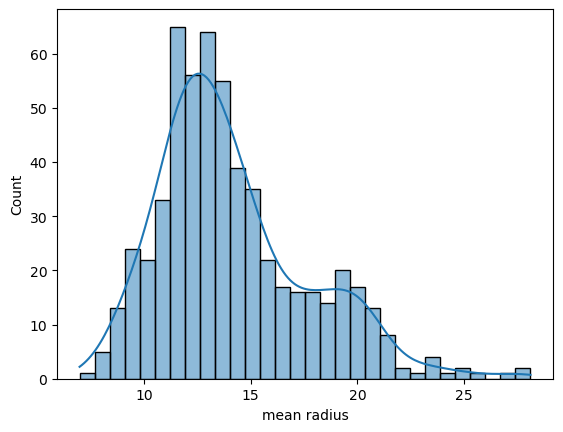

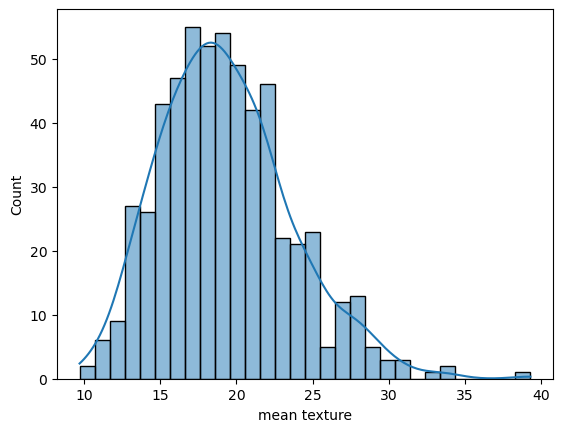

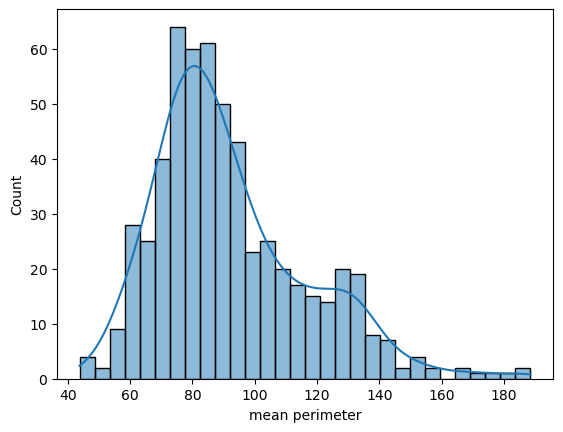

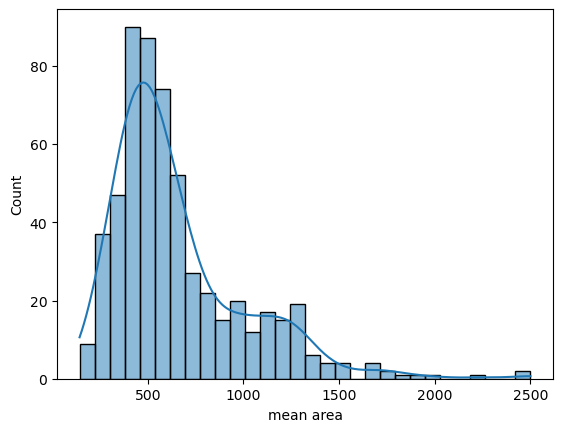

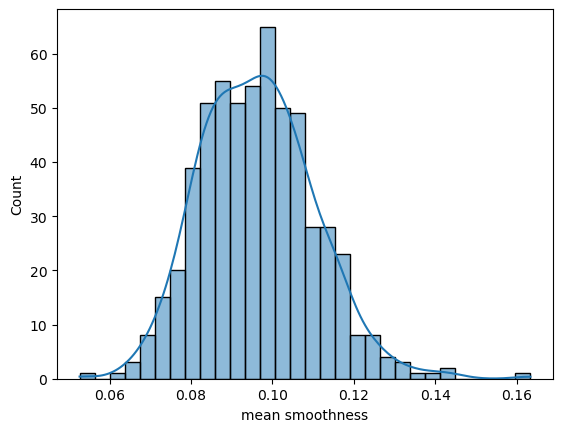

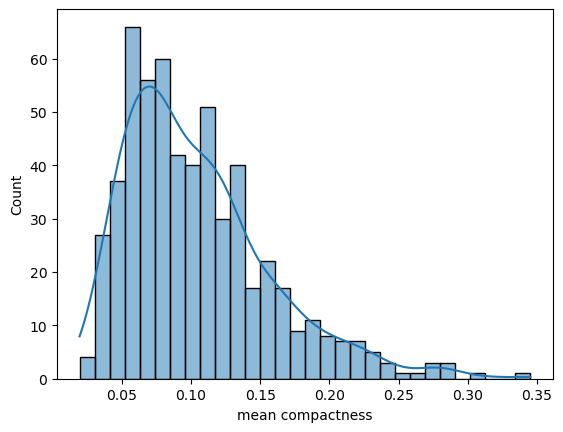

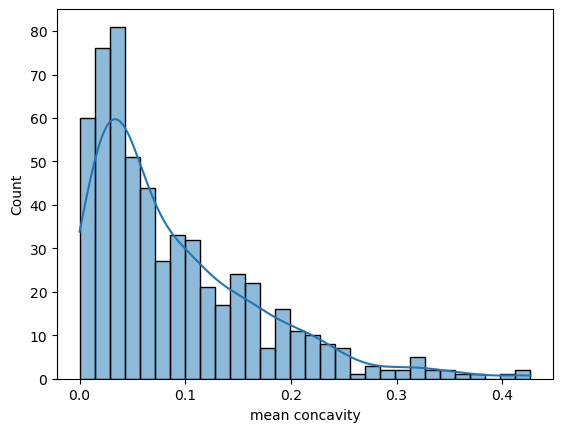

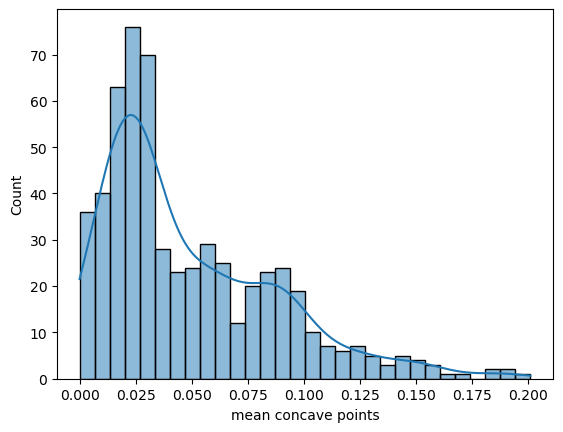

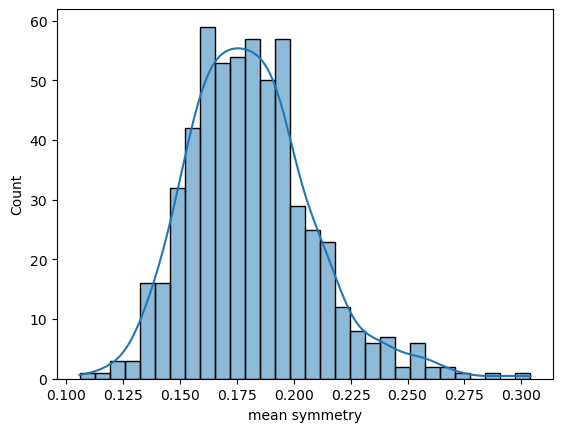

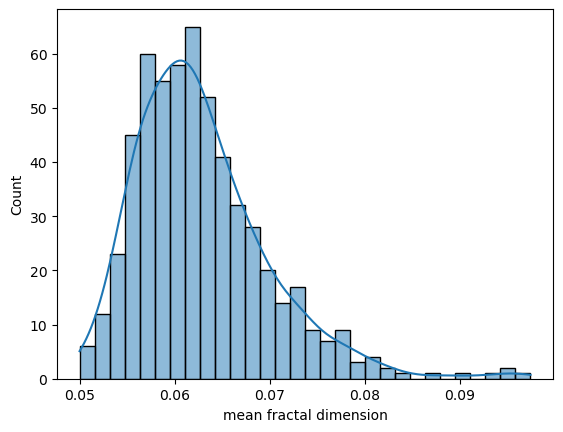

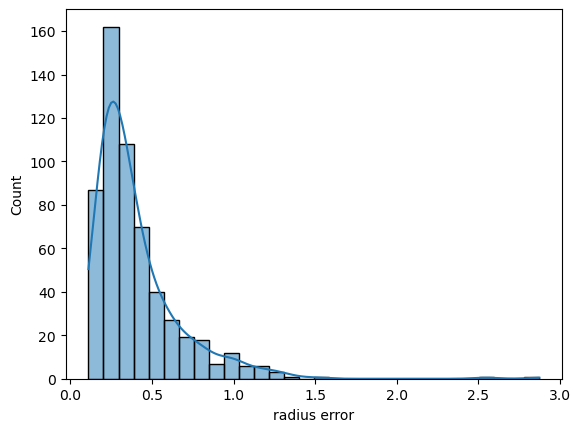

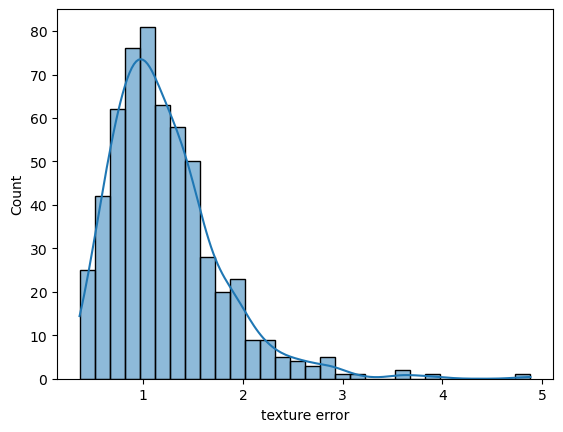

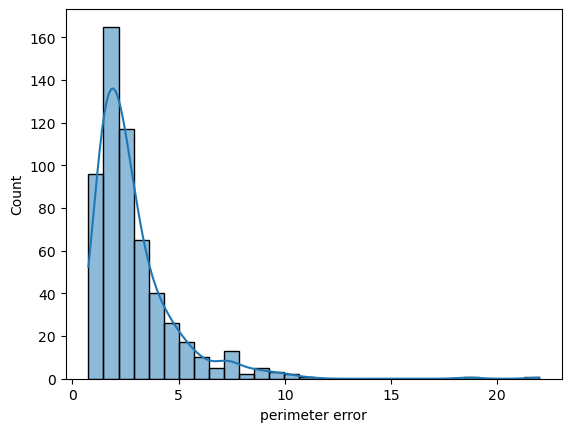

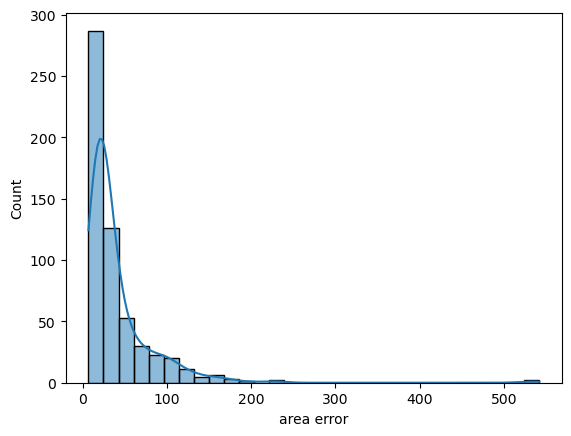

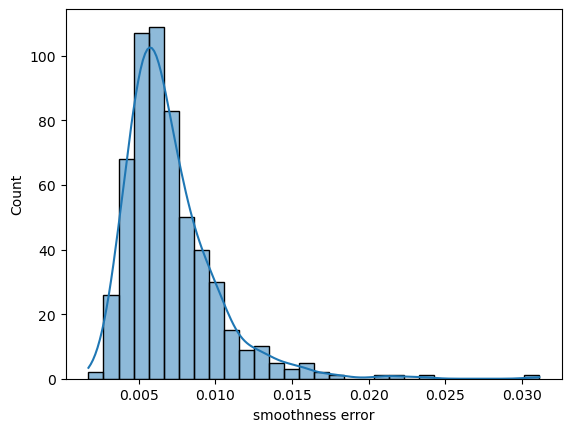

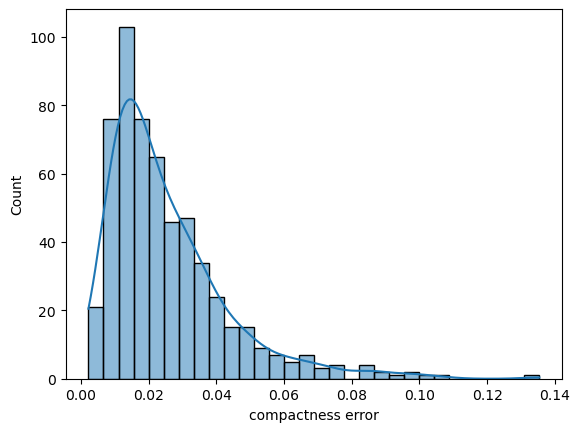

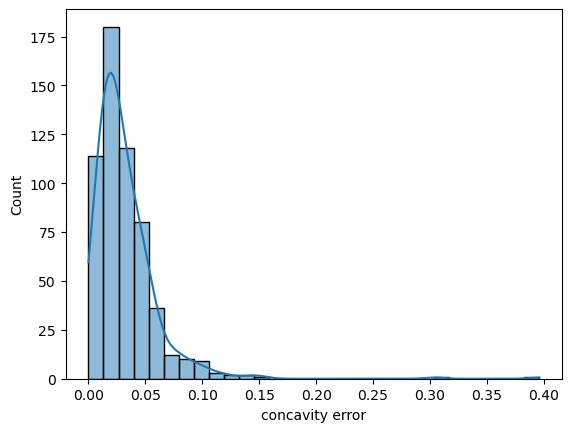

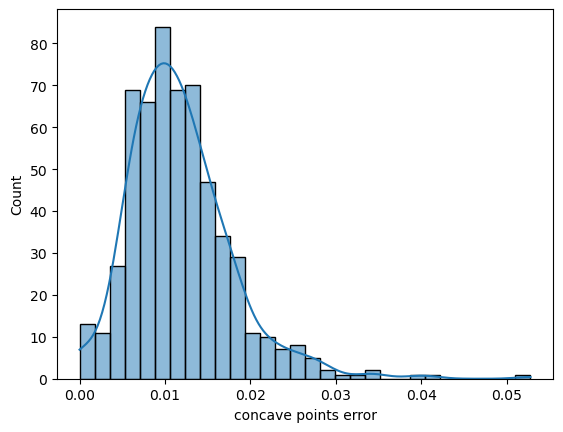

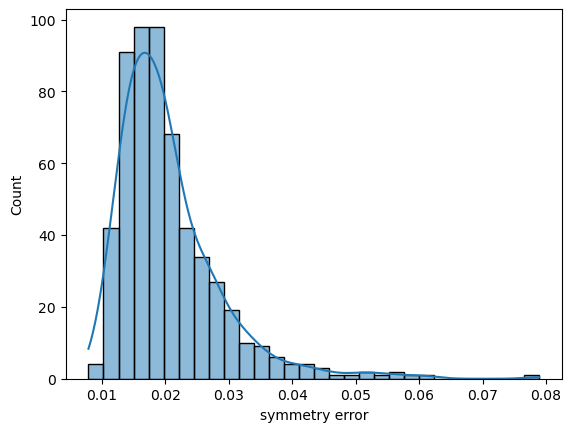

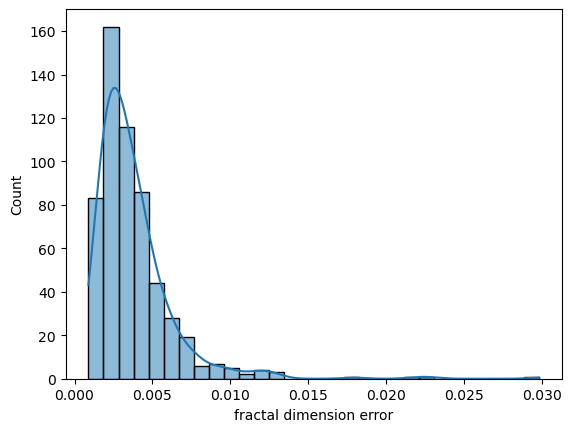

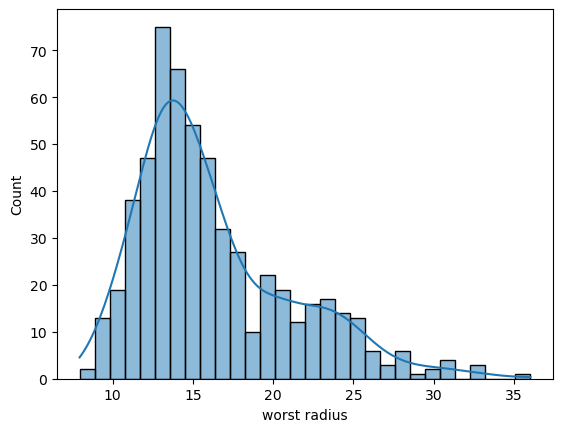

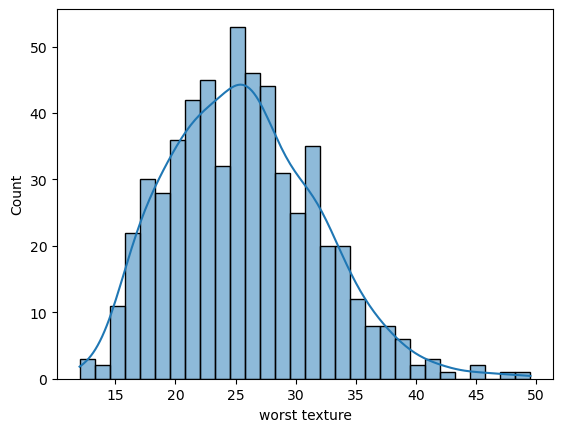

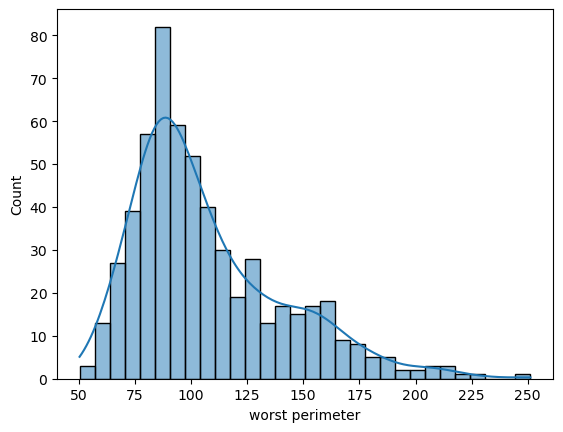

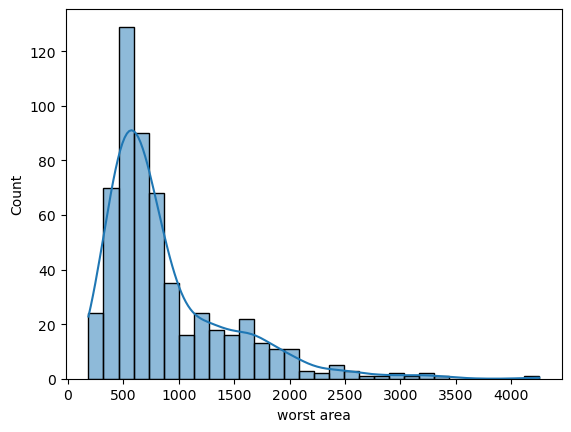

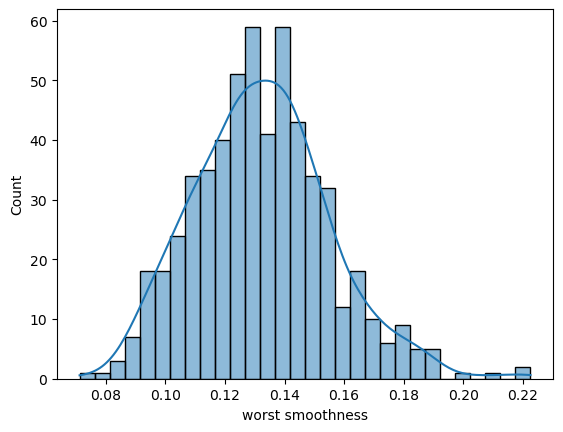

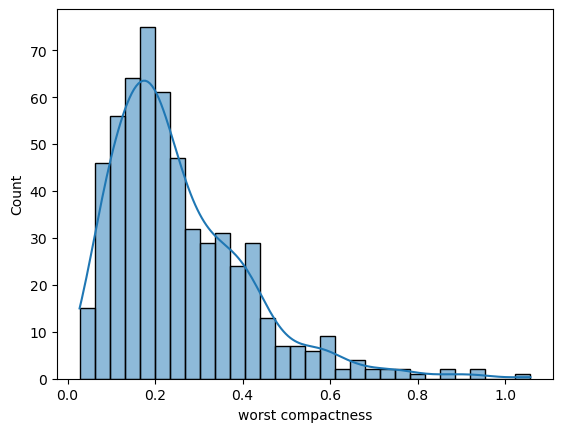

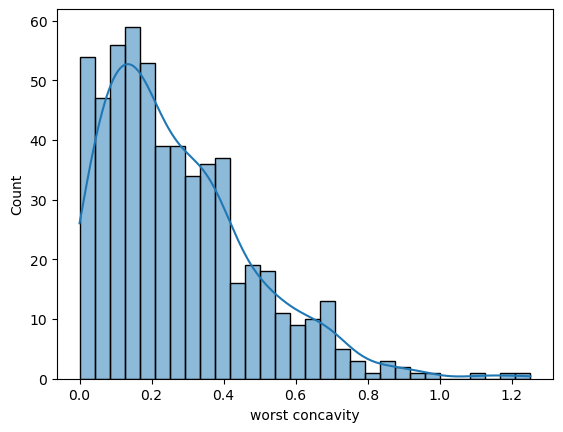

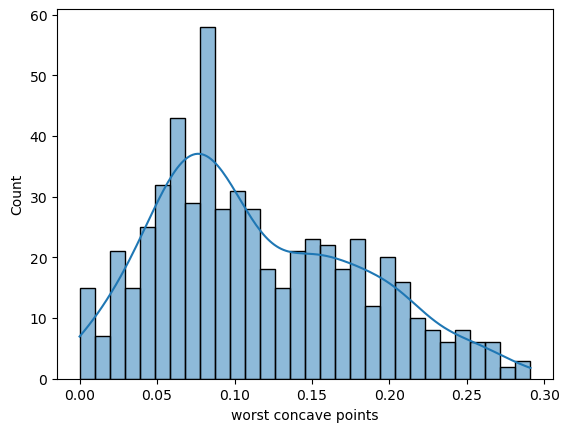

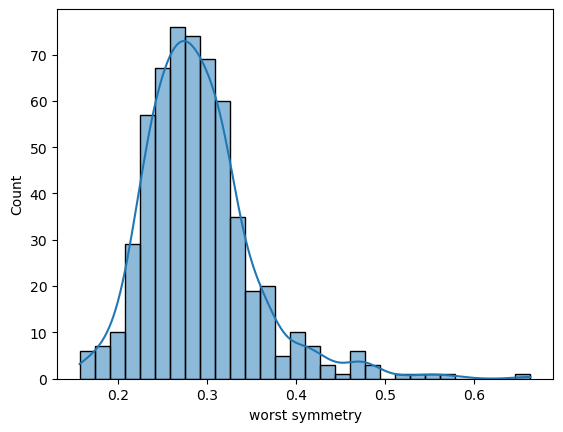

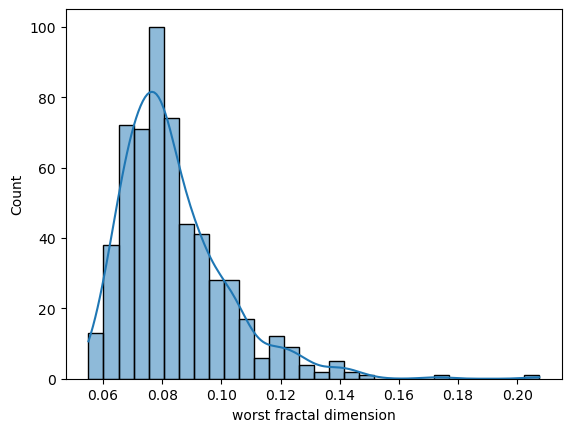

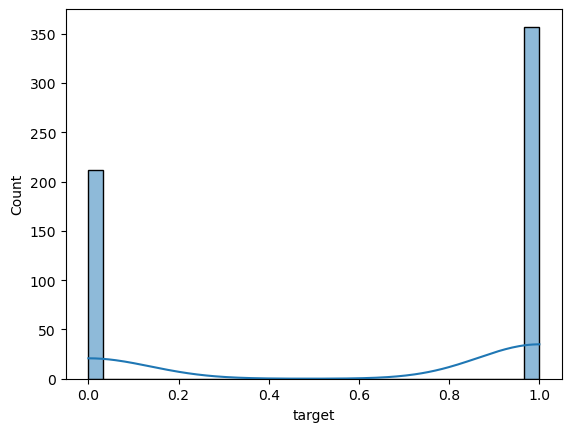

In [26]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()


array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

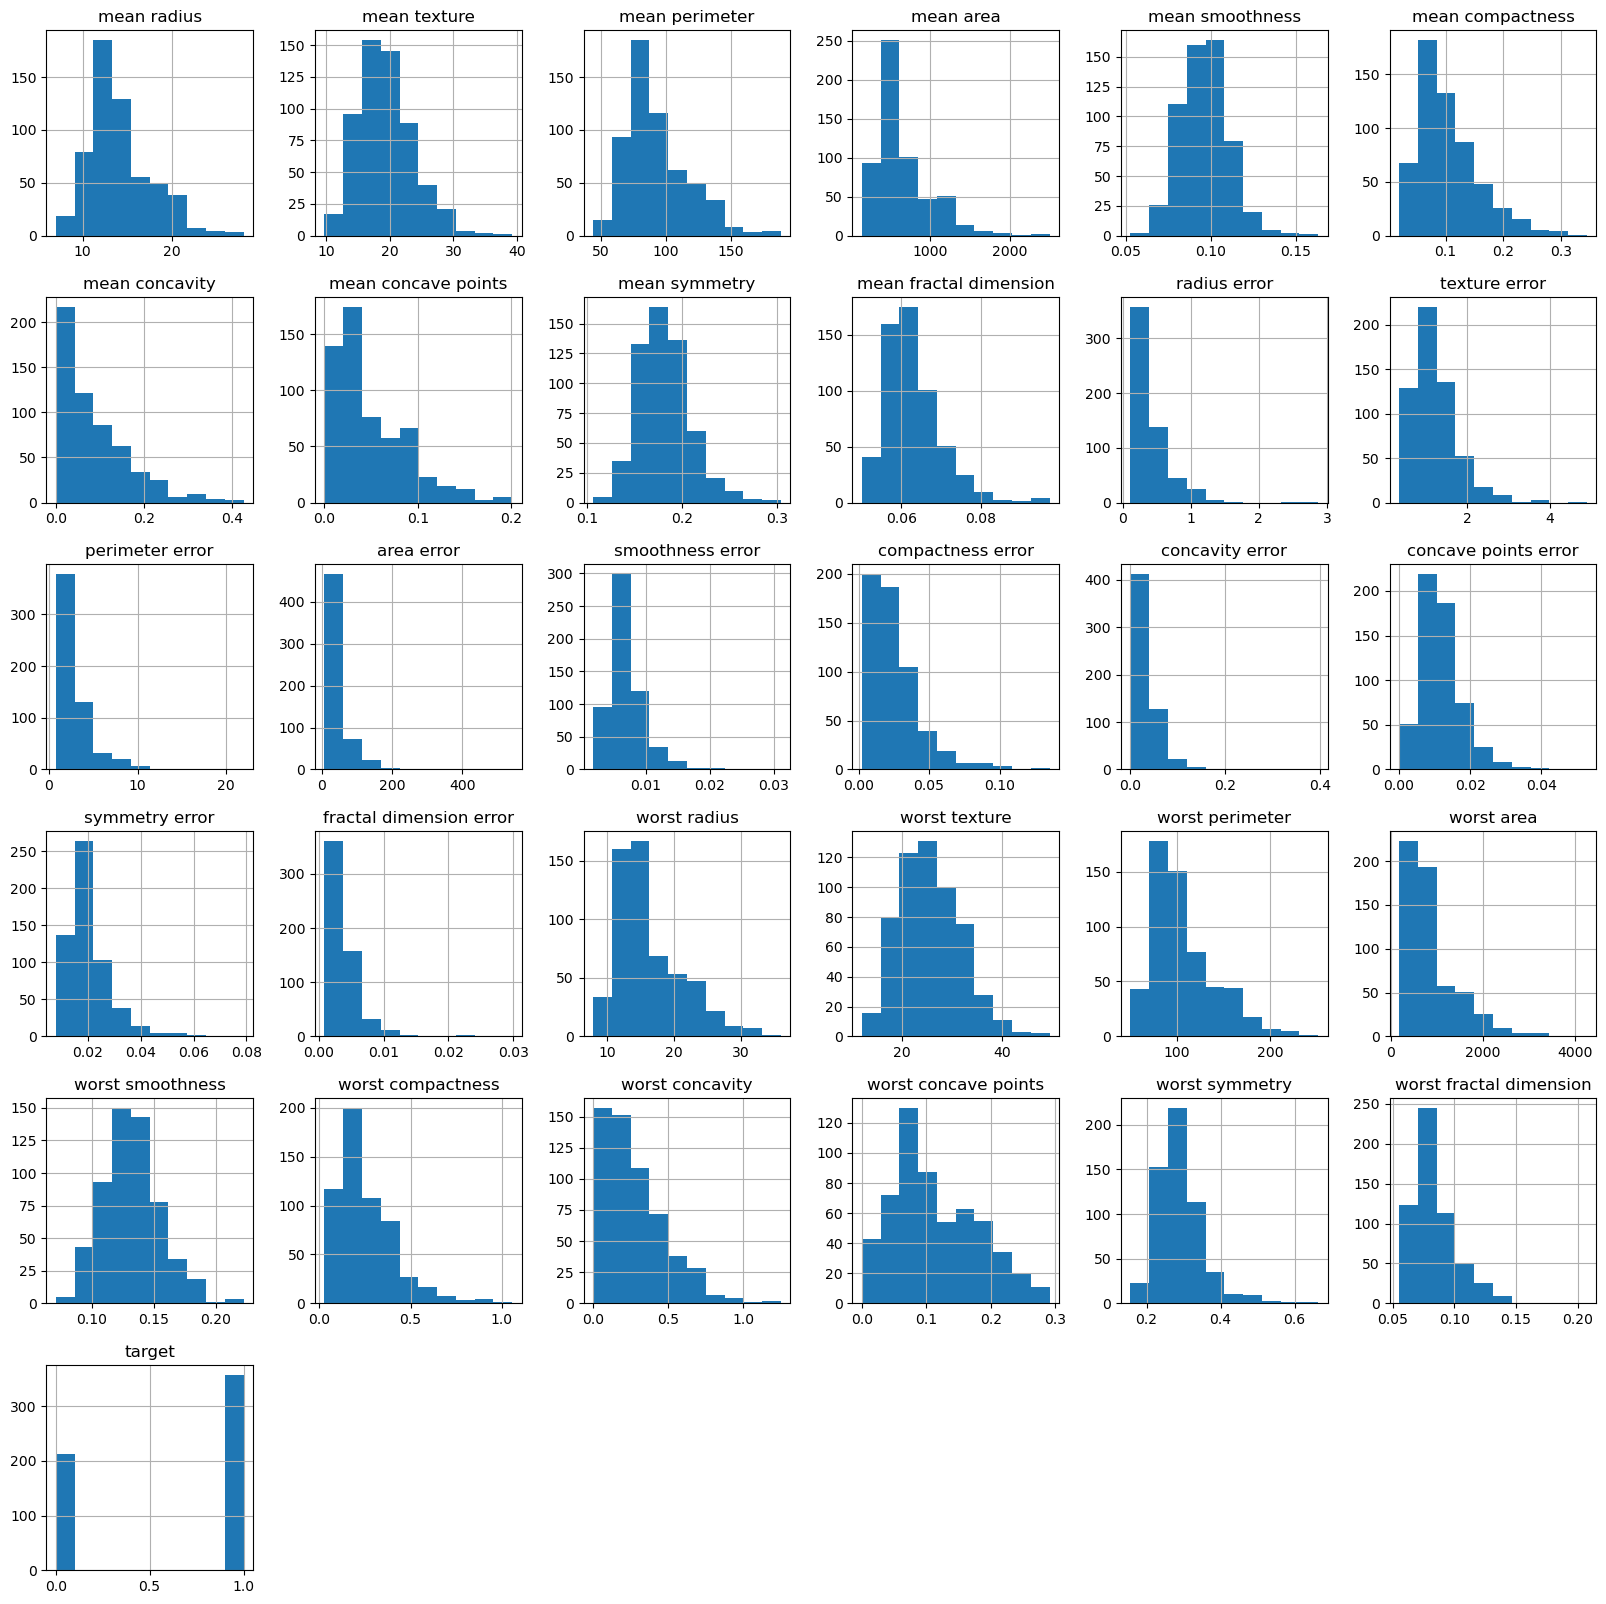

In [6]:
df.hist(figsize = (20,20))

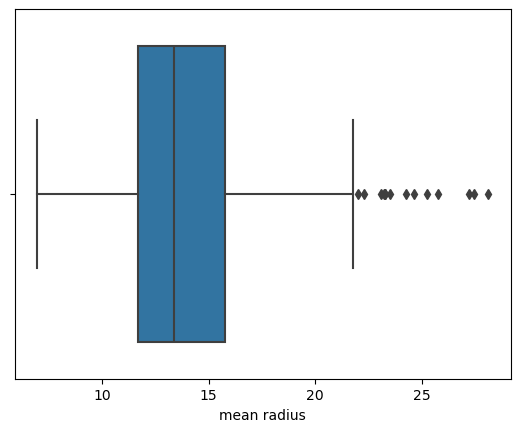

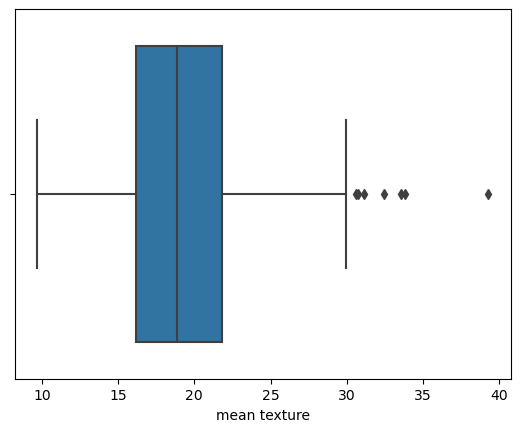

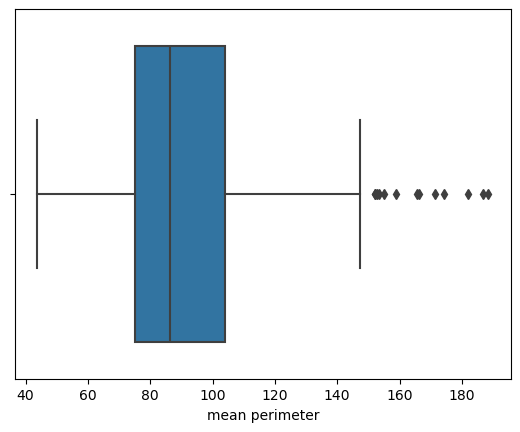

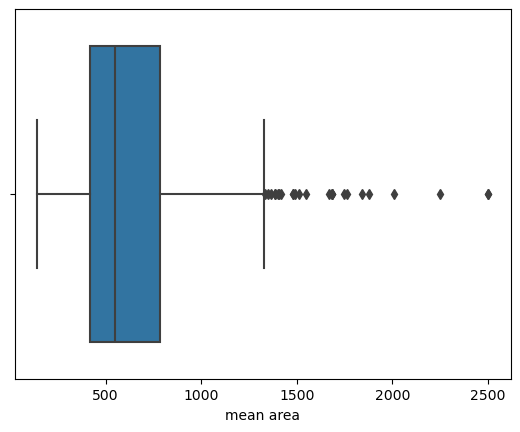

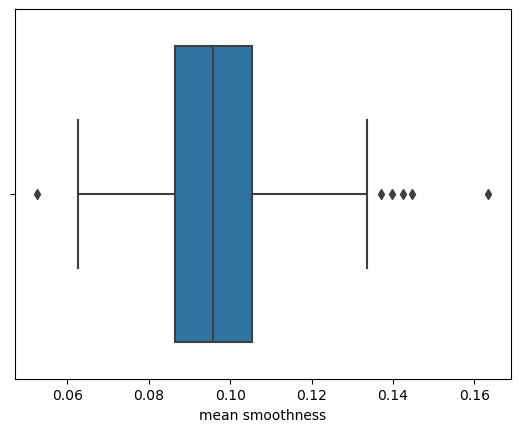

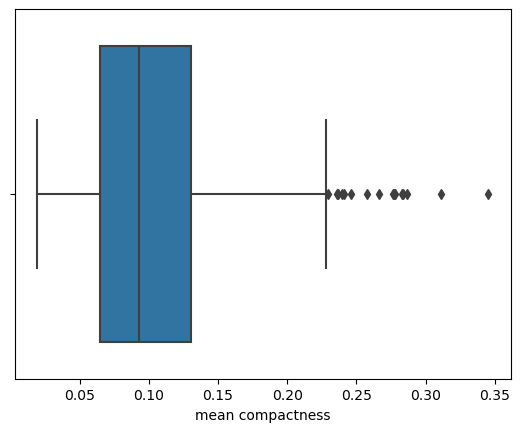

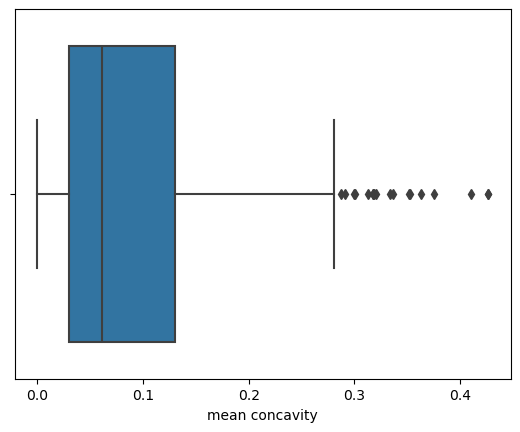

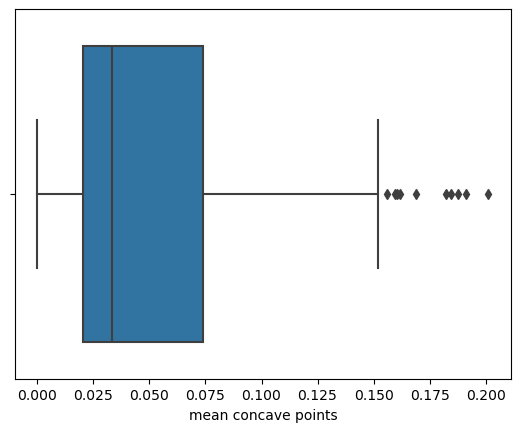

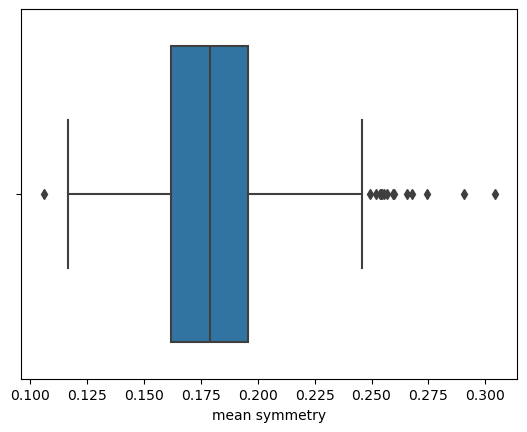

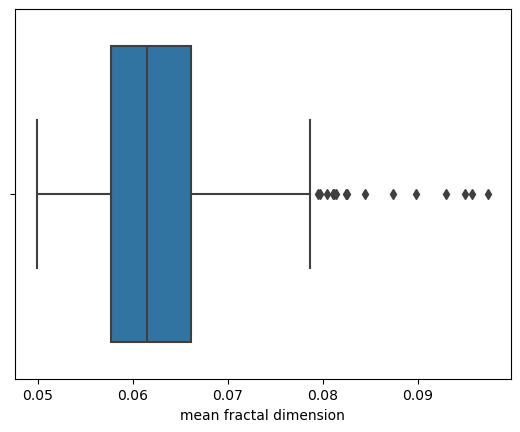

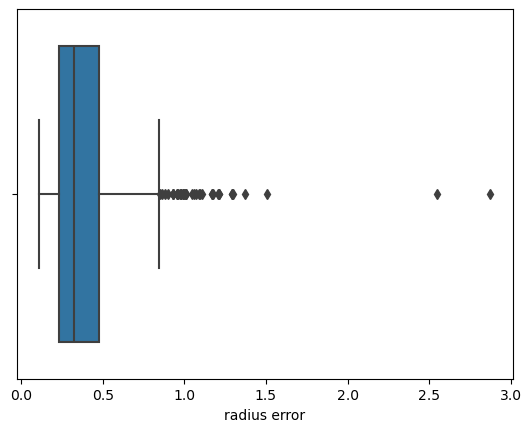

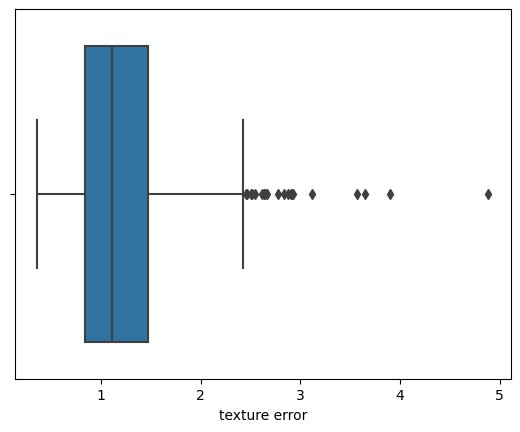

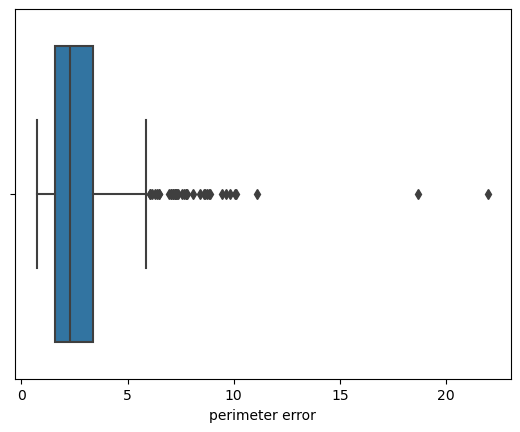

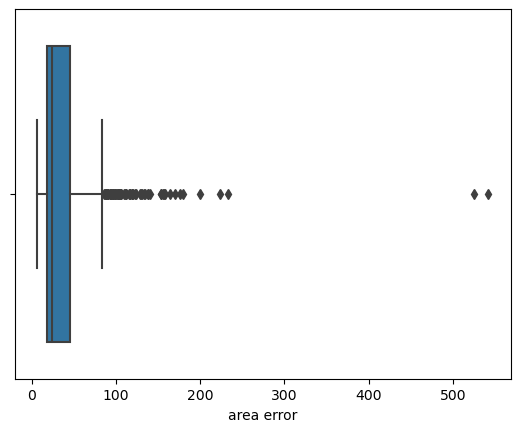

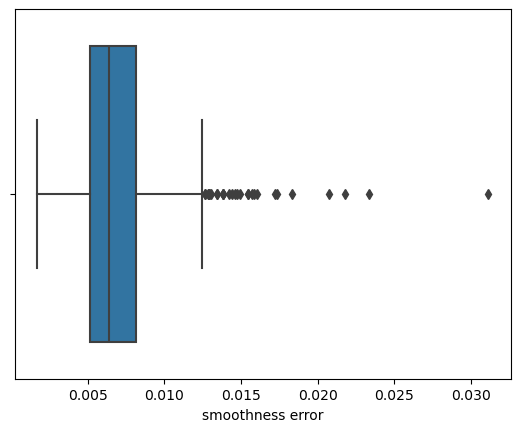

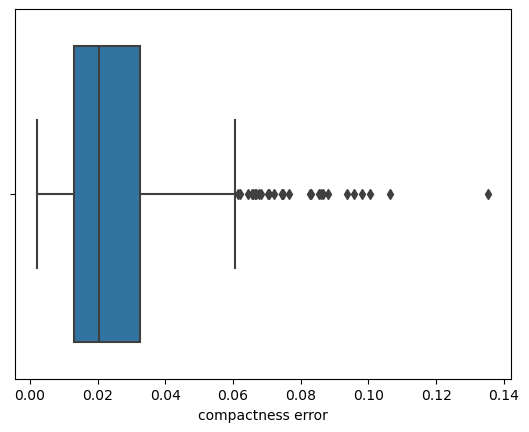

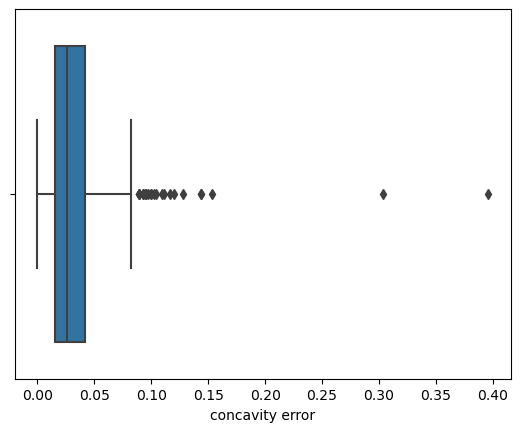

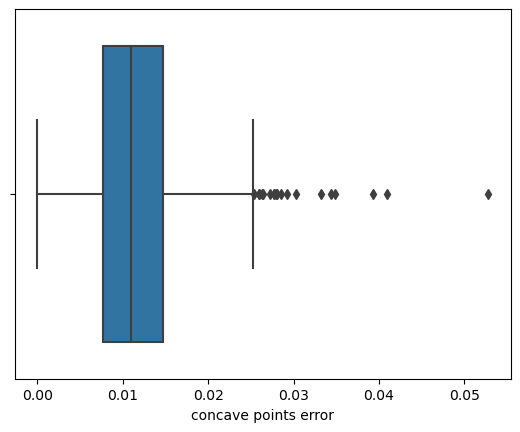

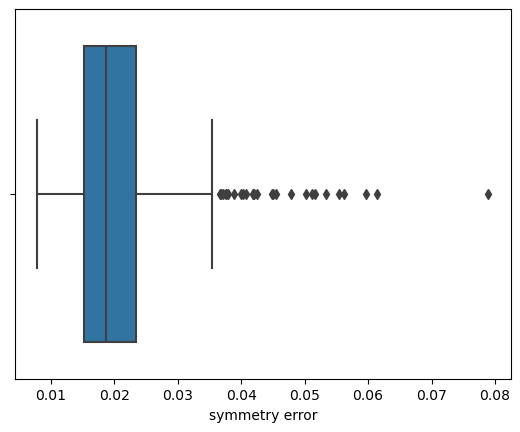

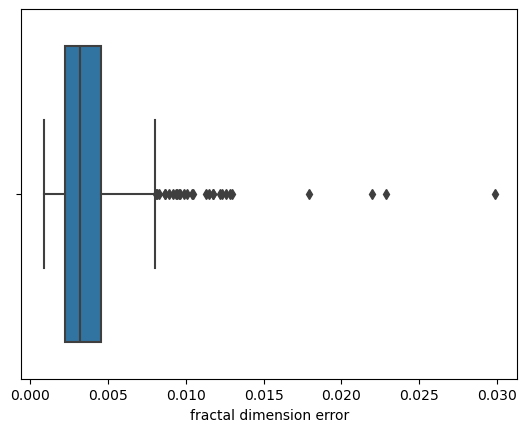

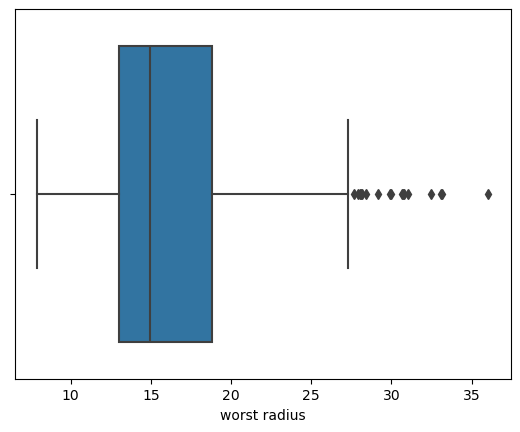

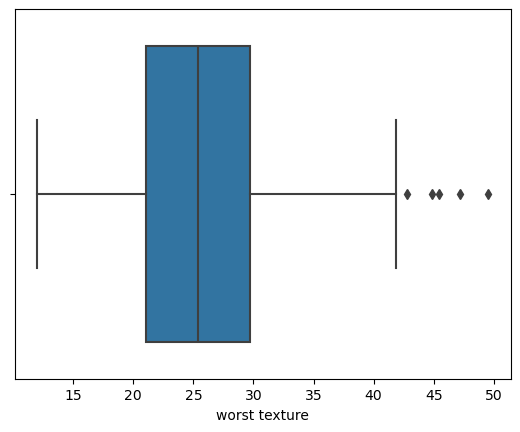

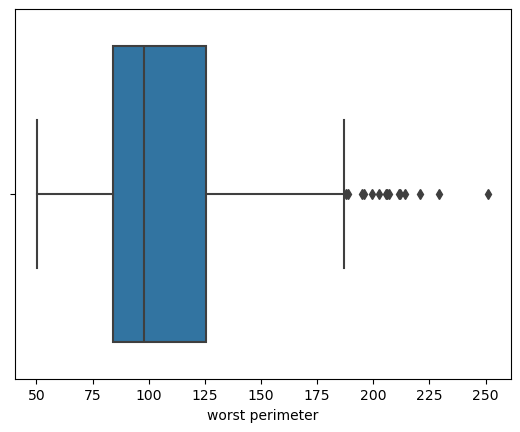

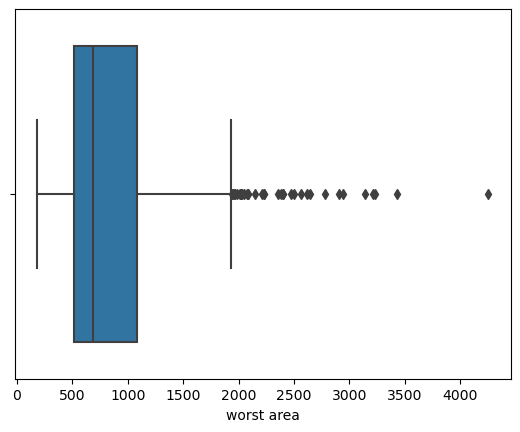

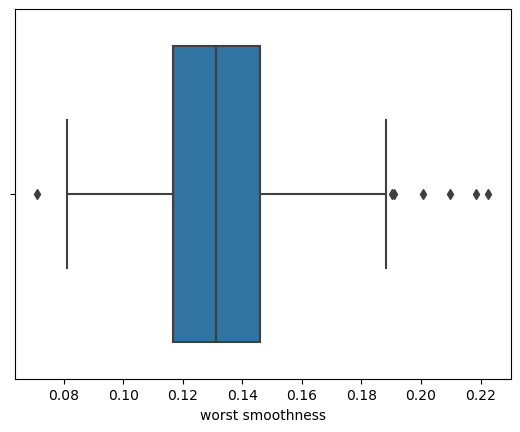

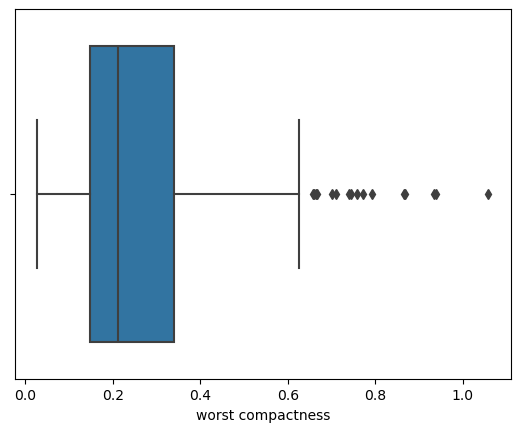

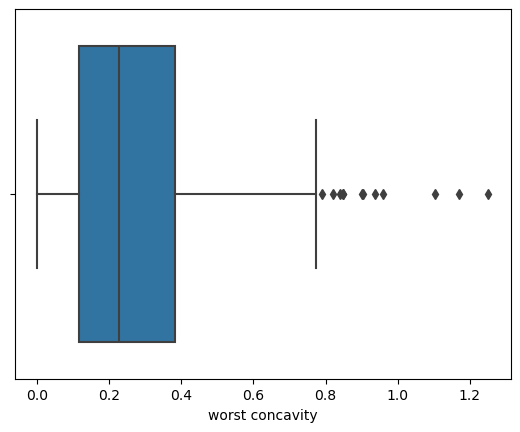

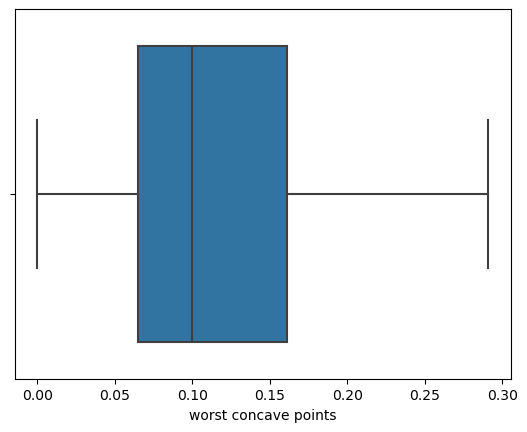

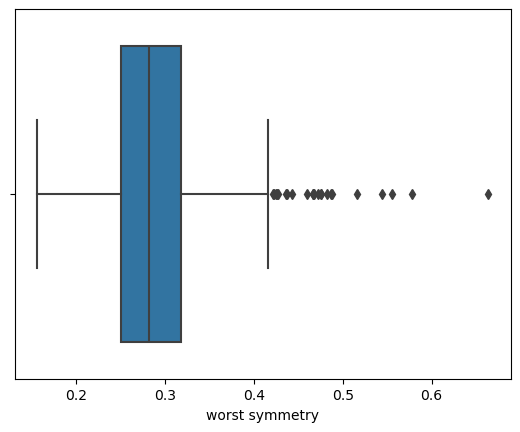

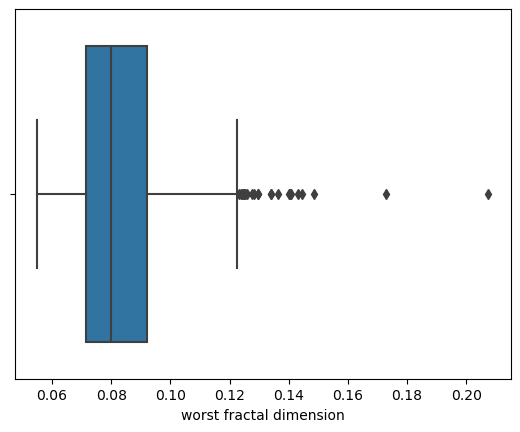

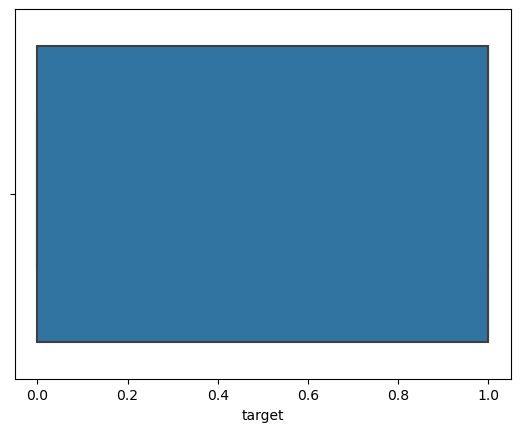

In [27]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

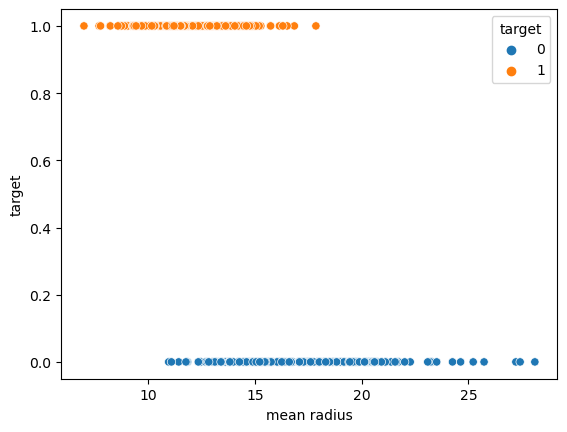

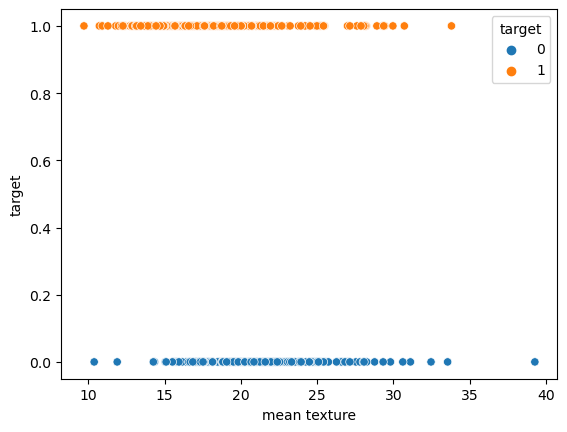

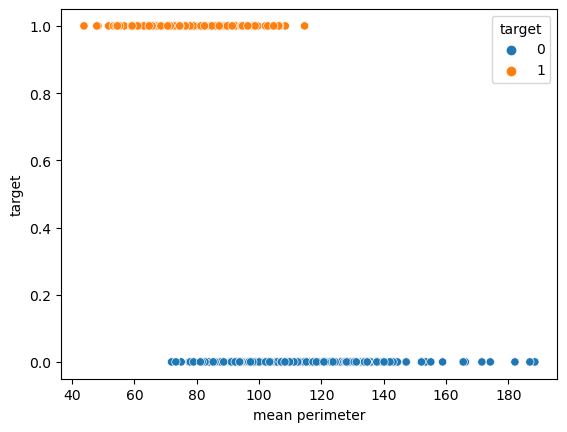

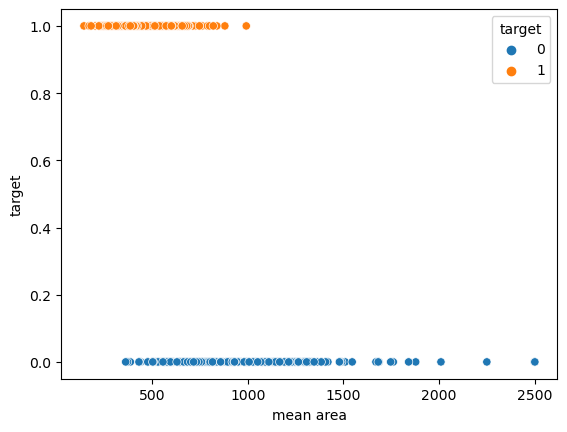

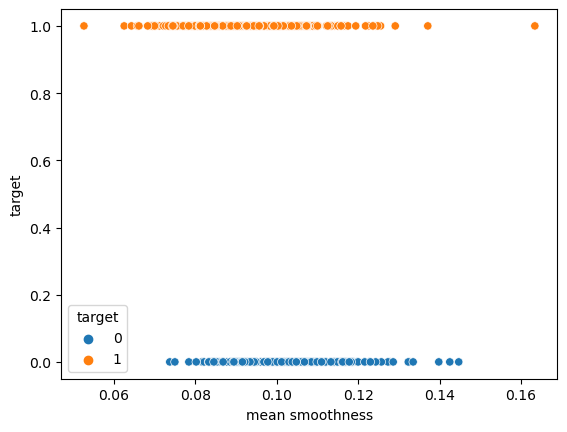

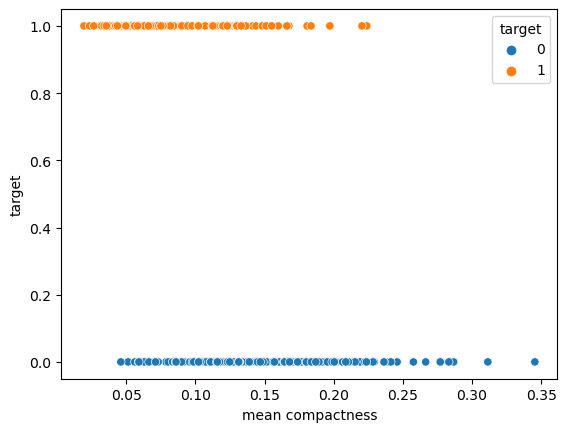

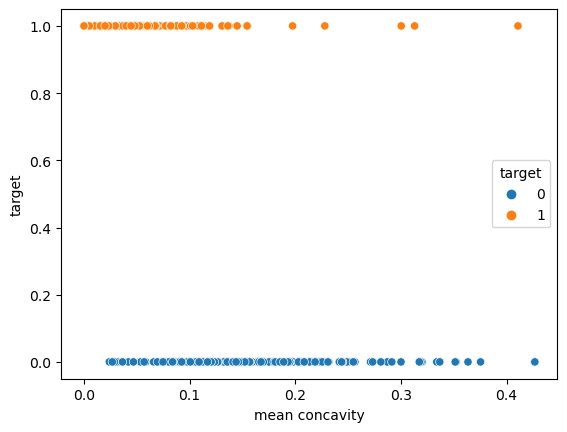

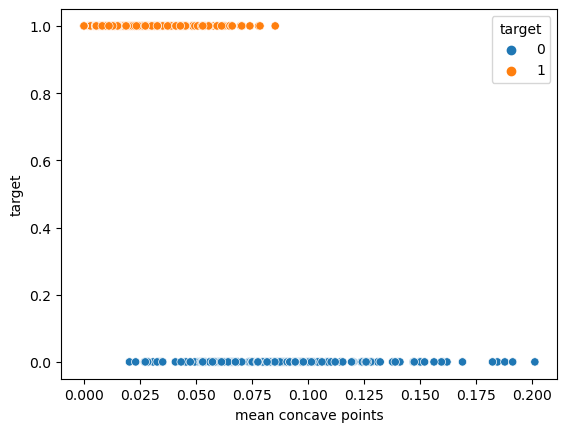

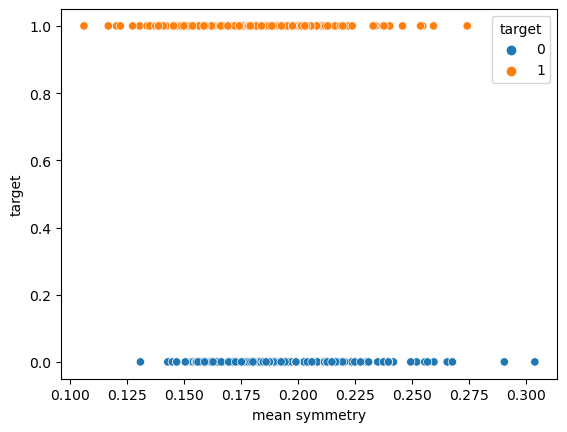

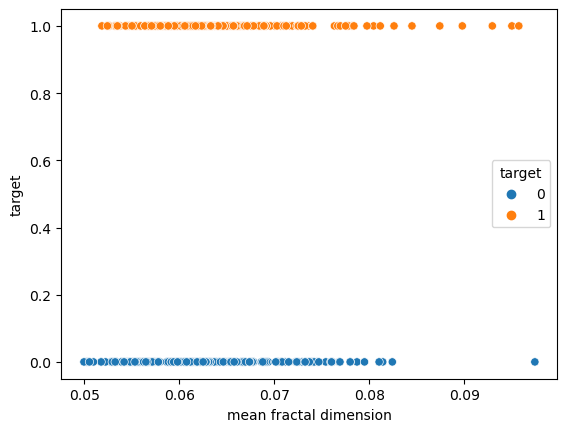

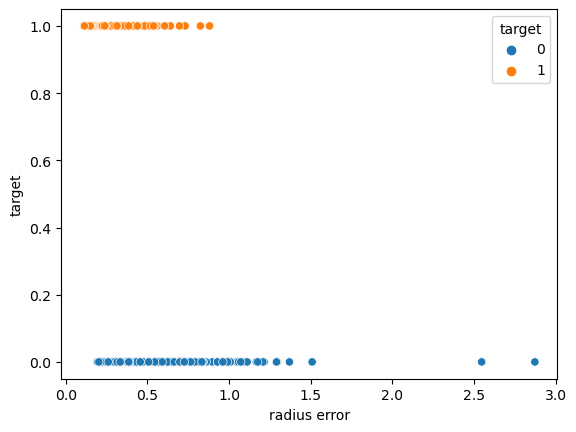

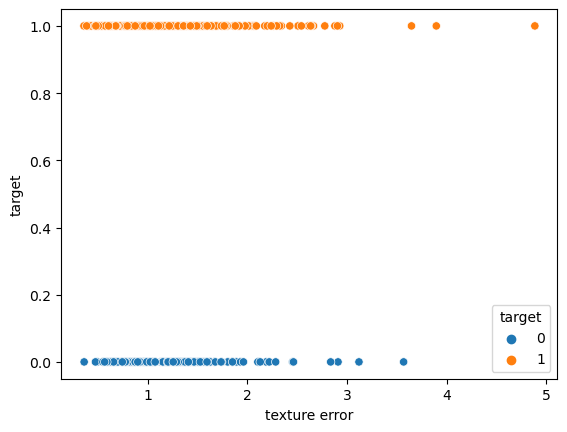

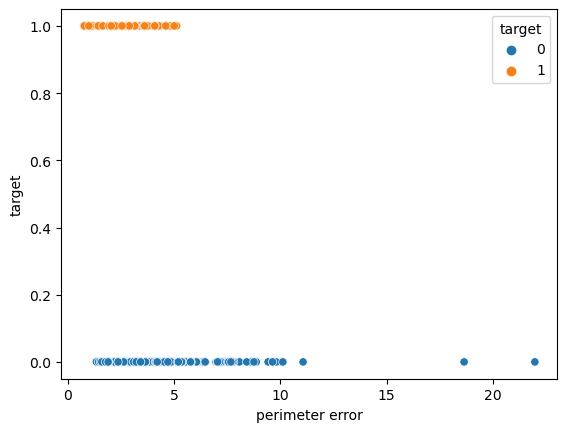

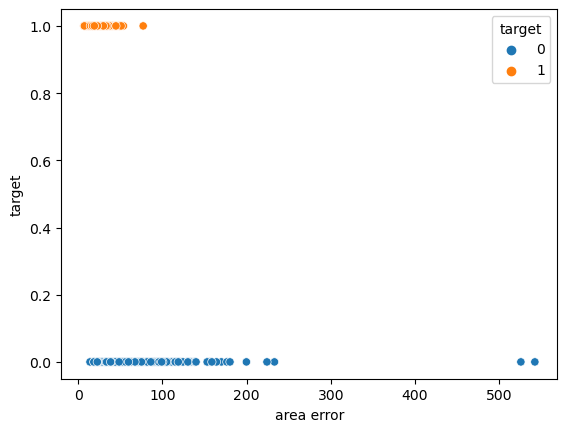

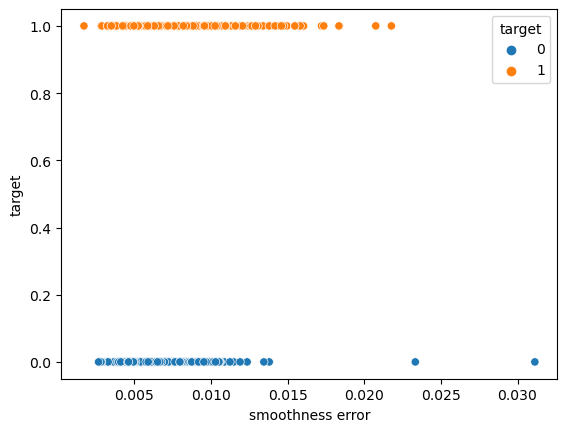

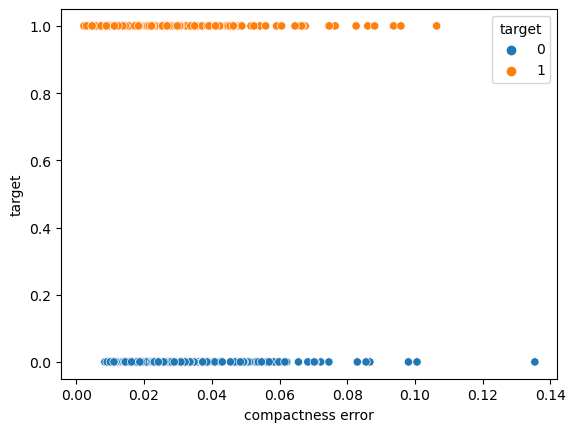

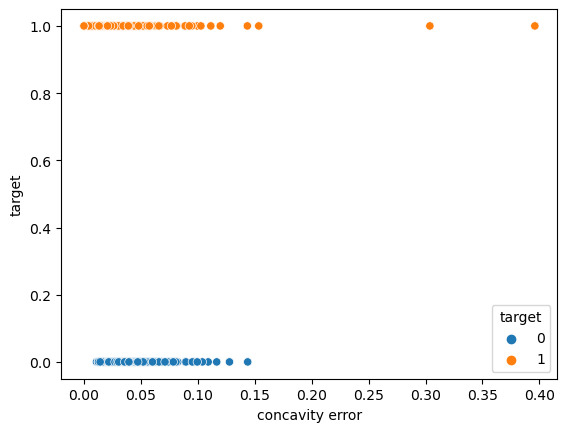

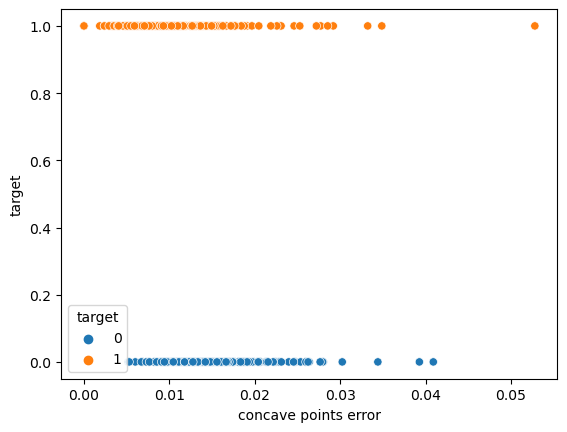

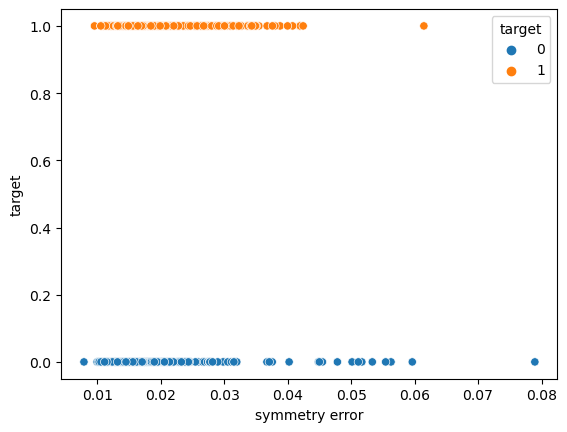

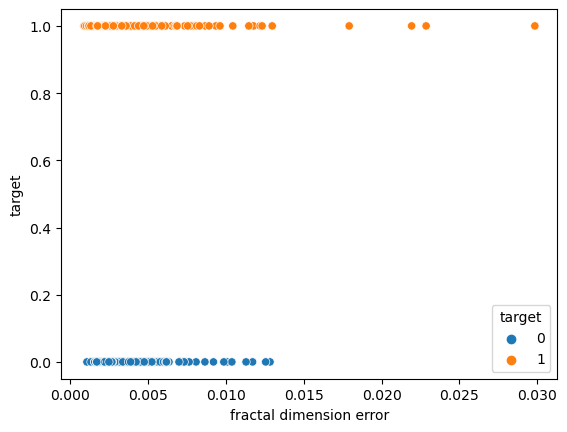

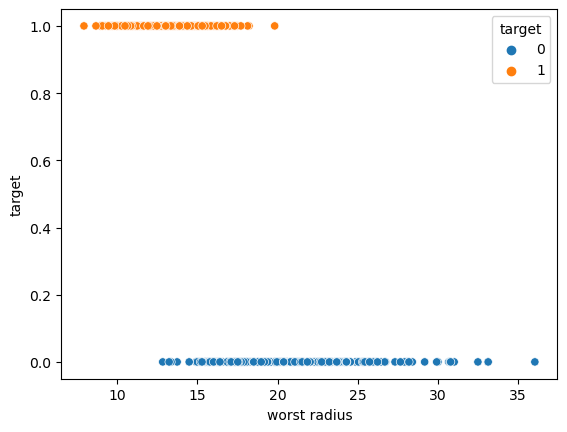

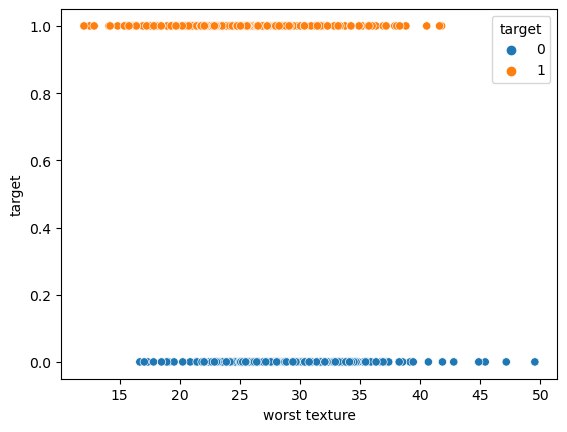

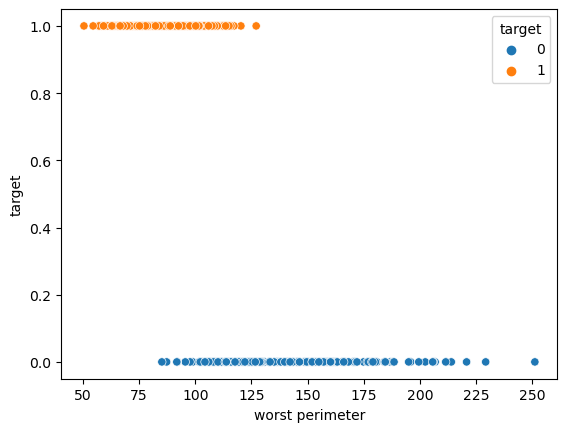

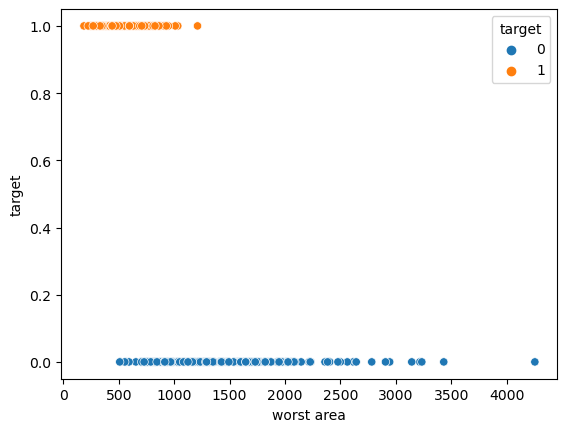

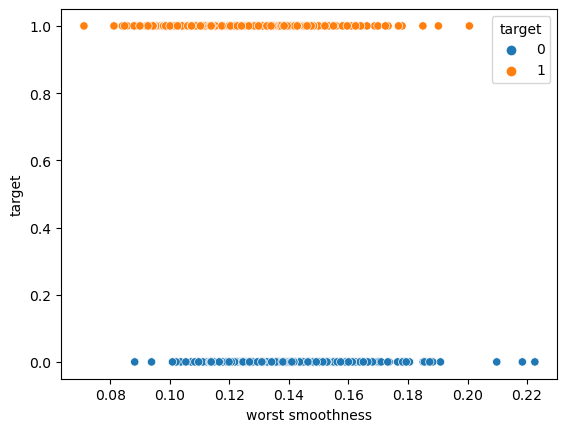

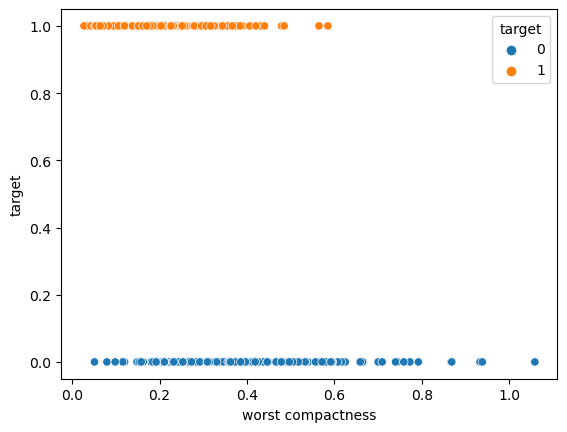

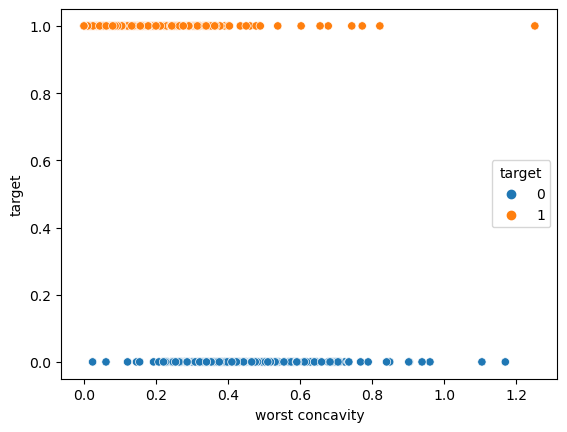

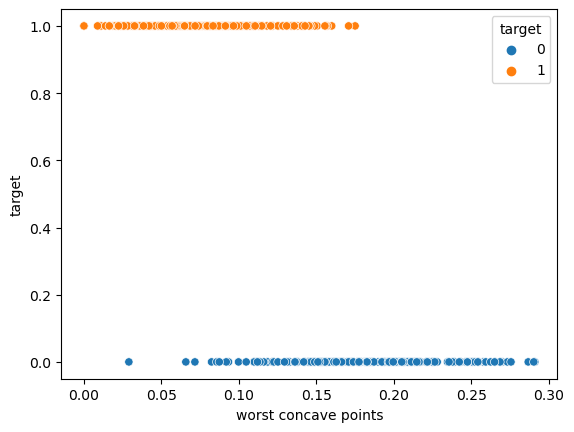

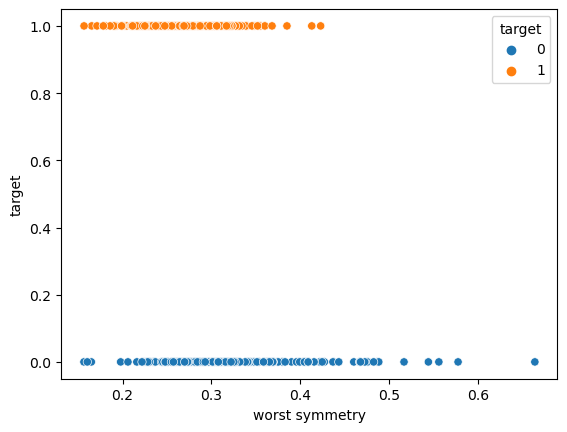

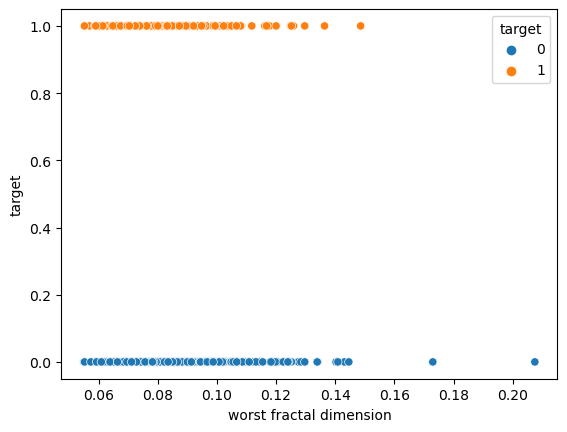

In [48]:
#Scatter Plot to understand the relationships
for i in ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       ]:
   sns.scatterplot(data=df,x=i,y='target',hue='target')
   plt.show()

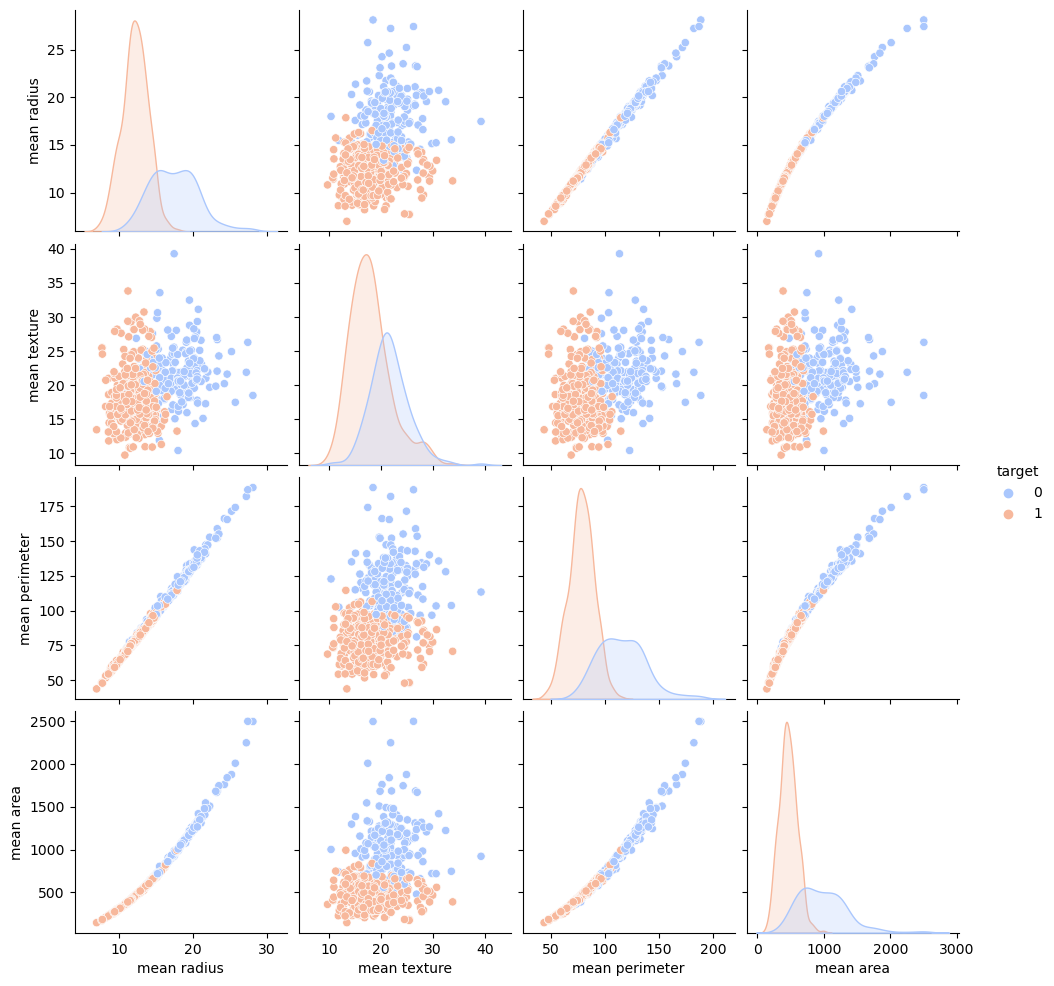

In [68]:
df['target'] = df.target  # Add the target labels

# Use seaborn's pairplot to visualize the relationships between multiple features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], 
             hue='target', palette='coolwarm')

plt.show()

In [ ]:
# Draw scatter plot for every feature
sns.pairplot(df)
plt.show()

In [ ]:
df.select_dtypes(include="number").columns

In [10]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()
s

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

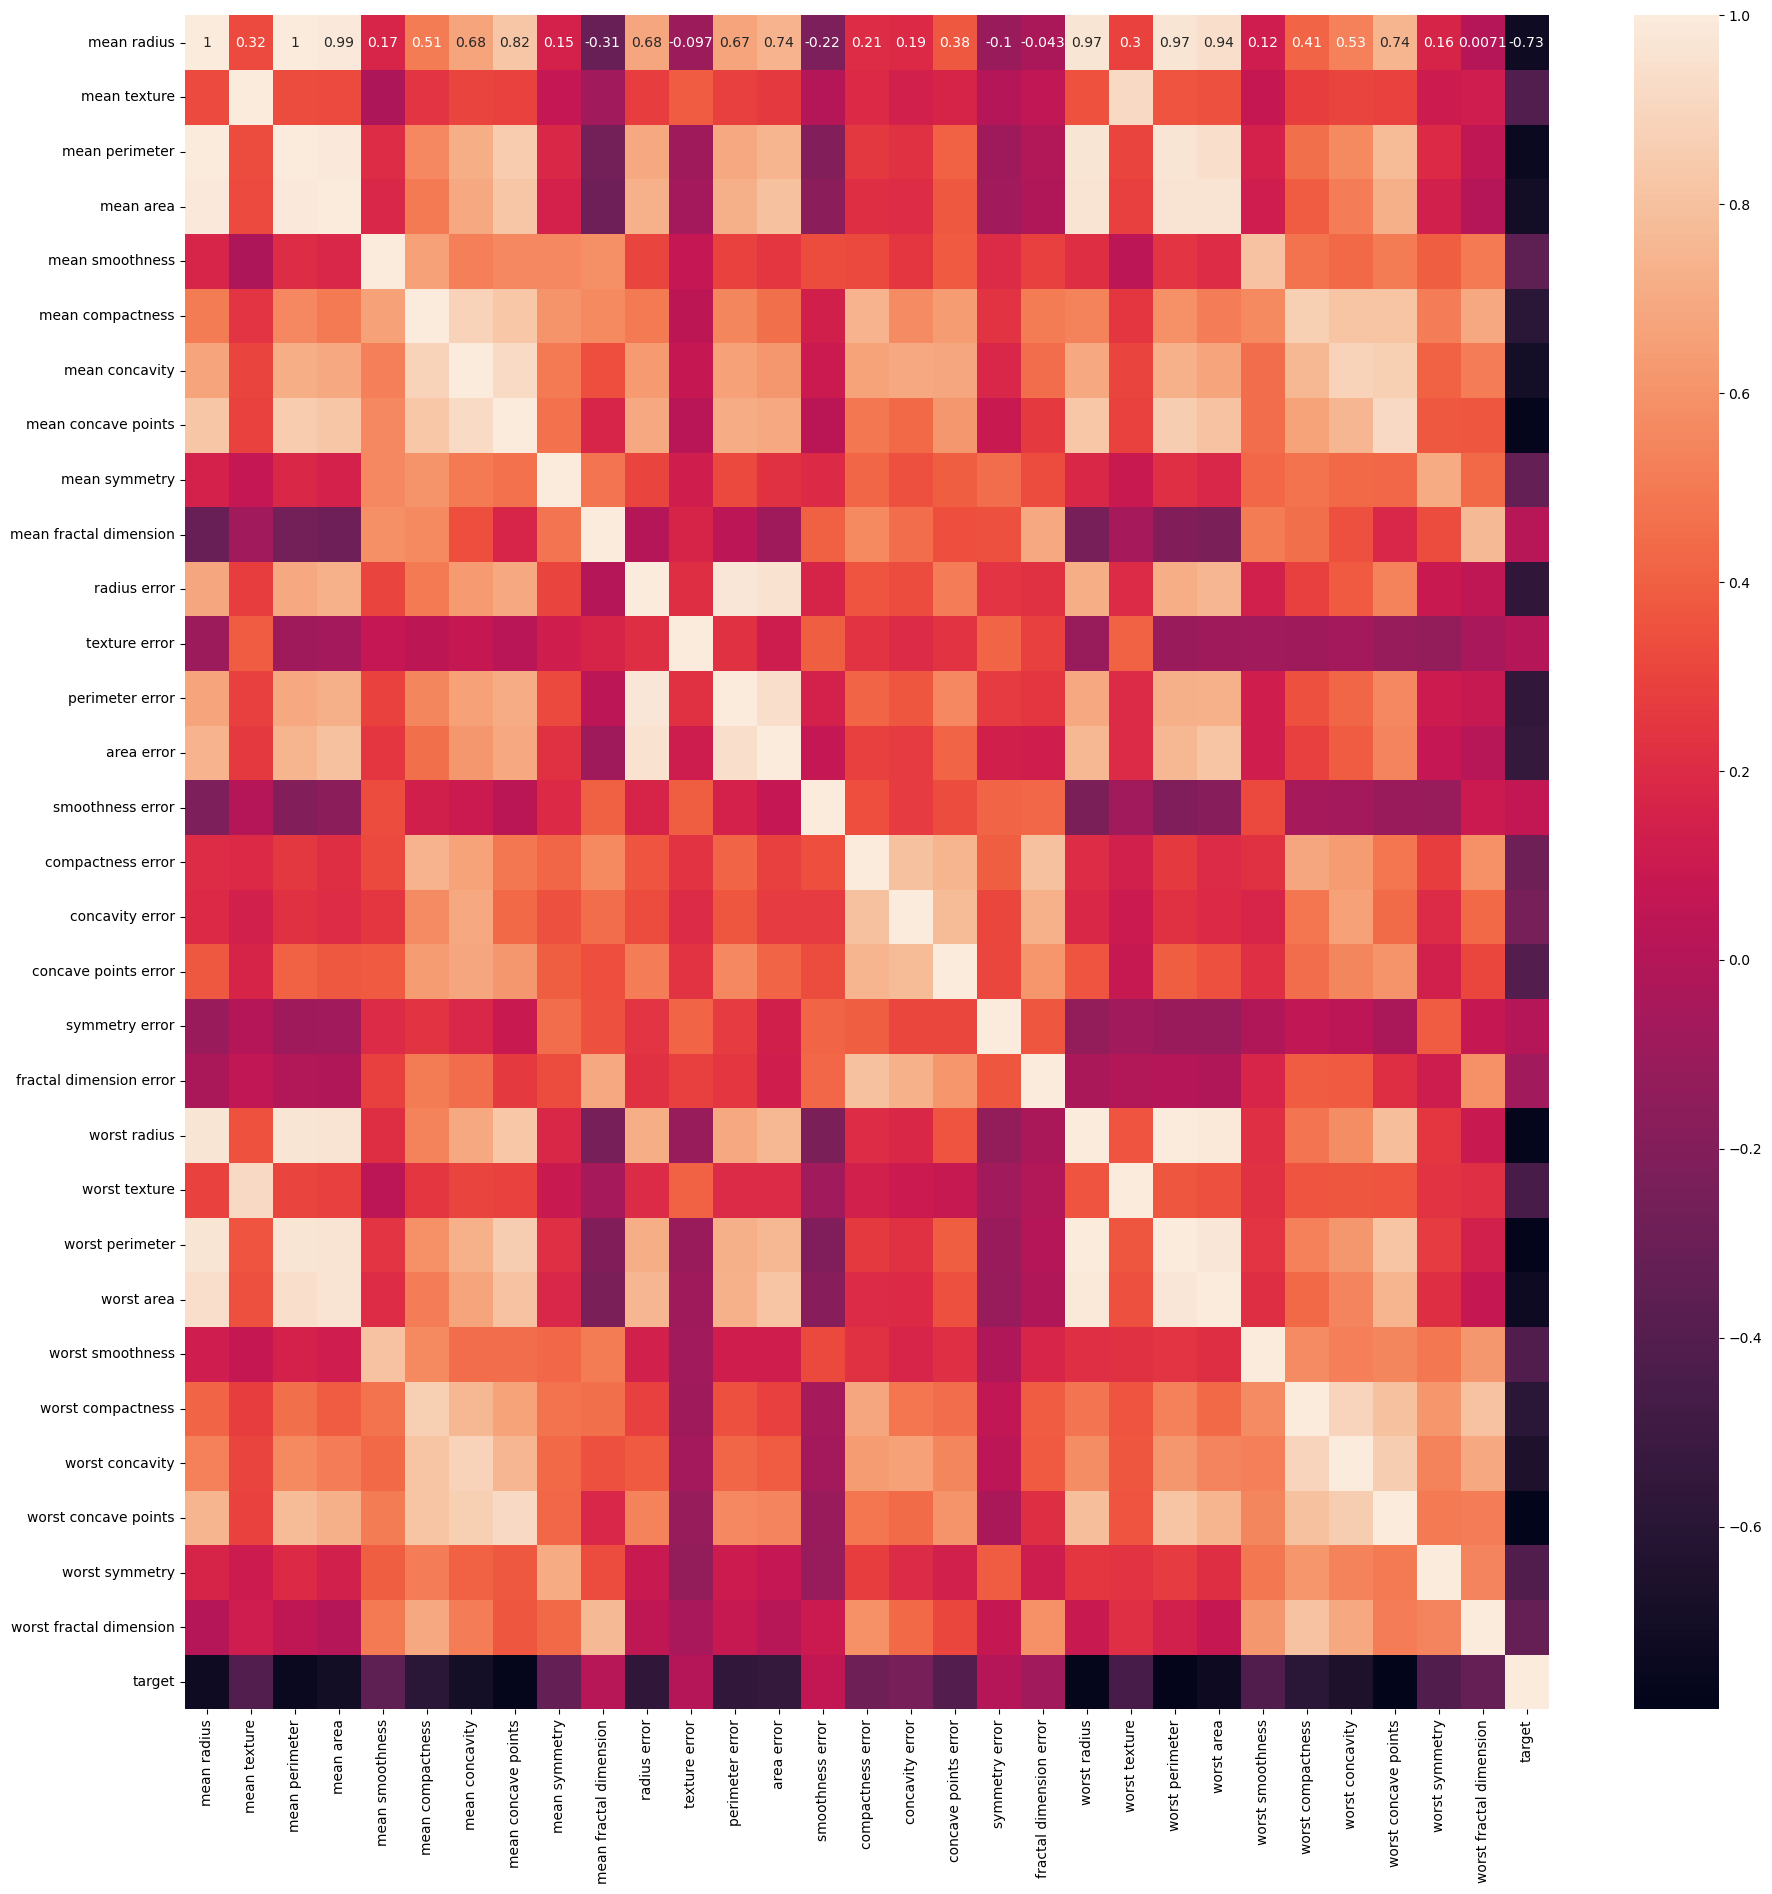

In [14]:
plt.figure(figsize=(22, 22))
sns.heatmap(s,annot=True)
plt.show()

# EDA Completed

# Step:5 -  Missing Value Treatments

# Choose the methodes of imputing missing values 3
# Mean, Median , Mode , KNNImputer
 
#No Missing value in datas.So no need of 
#impuations in this dataset.

In [51]:
#If null values are occured delete null 
#df.dropna(inplace=True)
#df.isnull().sum()
#No null values found
So no nned need to drop

In [18]:
df.shape

(569, 31)

# Step : 6- Outliers treatment

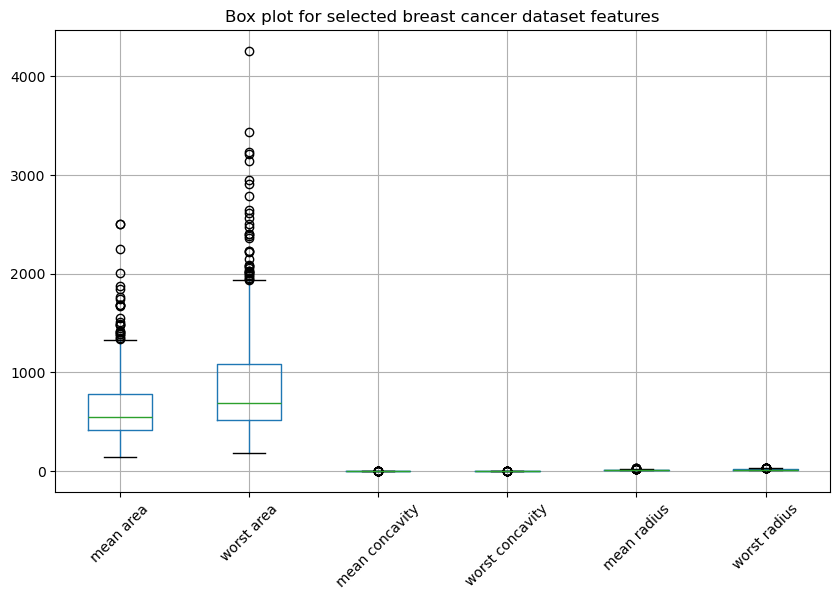

In [29]:
features = ['mean area', 'worst area', 'mean concavity', 'worst concavity', 
            'mean radius', 'worst radius']
plt.figure(figsize=(10, 6))
df.boxplot(column=features)
plt.title('Box plot for selected breast cancer dataset features')
plt.xticks(rotation=45)
plt.show()

These are the important columns and supposed to outlier treatments on this columns.


#### IQR


In [32]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers




# Zscore

In [33]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

# Outlier treatment of each column in the data set using for group.

Trim outliers with IQR method on columns 'mean area', 'worst area', 'mean concavity', 'worst concavity', 
'mean radius', 'worst radius'

In [34]:
tdf = df.copy()
columns = ['mean area', 'worst area', 'mean concavity', 'worst concavity', 
            'mean radius', 'worst radius'] # 'mean area', 'worst area', 'mean concavity', 'worst concavity', 'mean radius', 'worst radius'
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf.shape

Outliers in mean area : 25
Shape after trimming (544, 31)
Outliers in worst area : 35
Shape after trimming (509, 31)
Outliers in mean concavity : 15
Shape after trimming (494, 31)
Outliers in worst concavity : 12
Shape after trimming (482, 31)
Outliers in mean radius : 9
Shape after trimming (473, 31)
Outliers in worst radius : 14
Shape after trimming (459, 31)


(459, 31)

In [37]:
print("Before trimming",df.shape)
print("After trimming",tdf.shape)                                                     # outlier trimmed dataframe


Before trimming (569, 31)
After trimming (459, 31)


Outliers are removed successfully using IQR methode

# Visualization after outlier trim and dropping duplicates

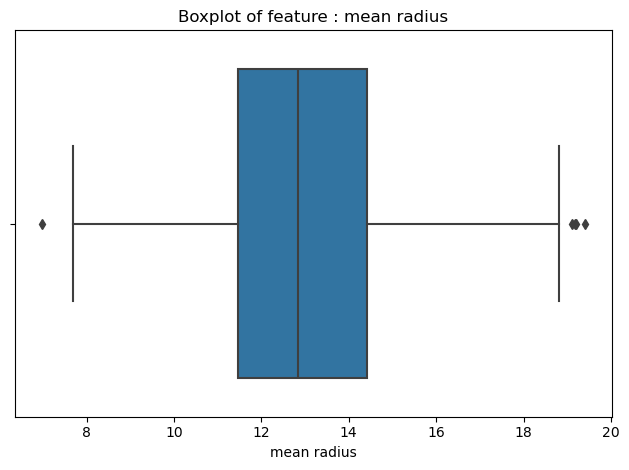

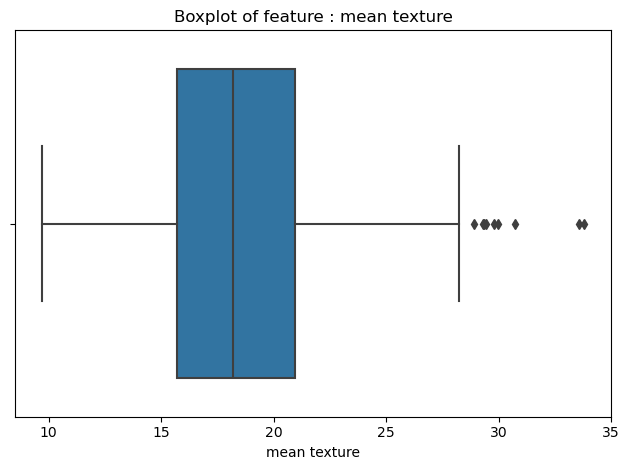

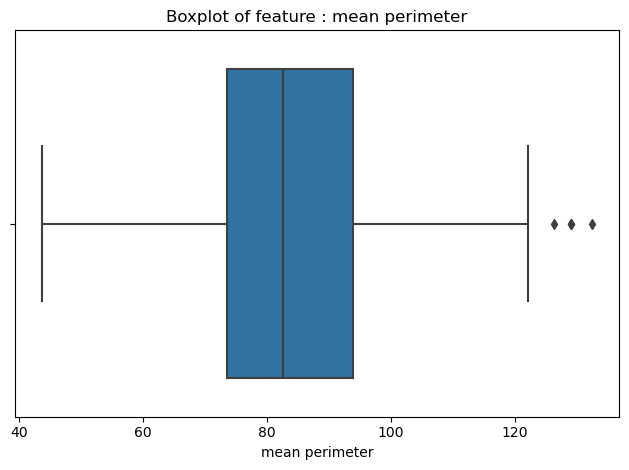

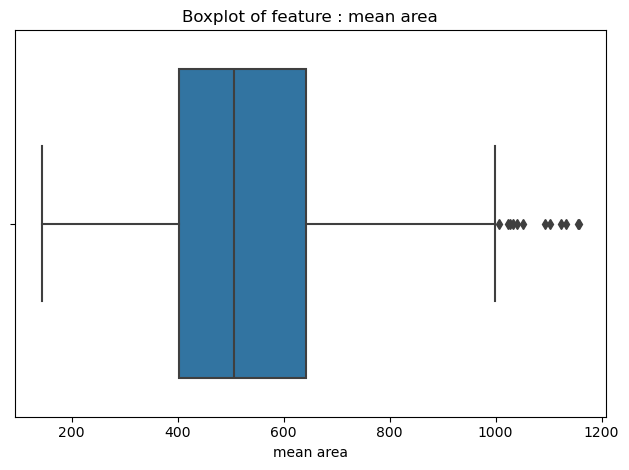

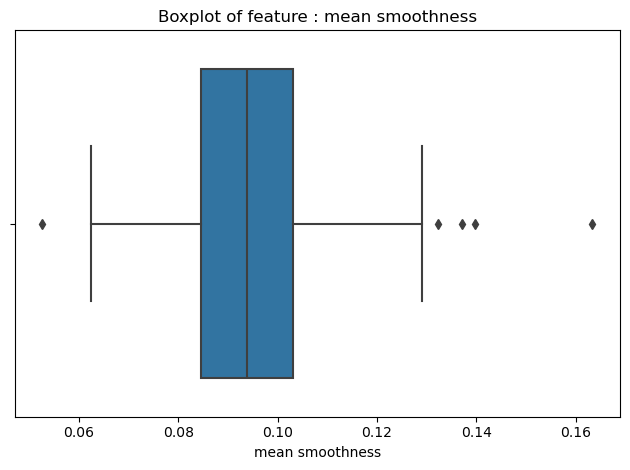

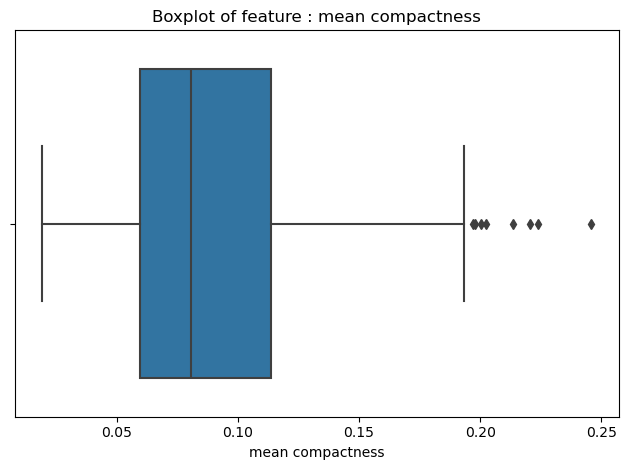

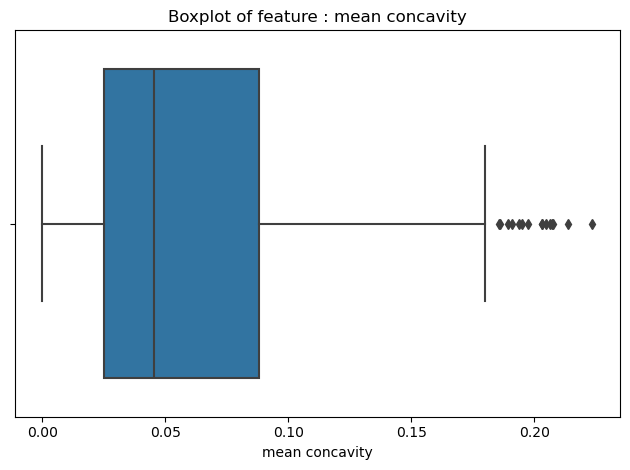

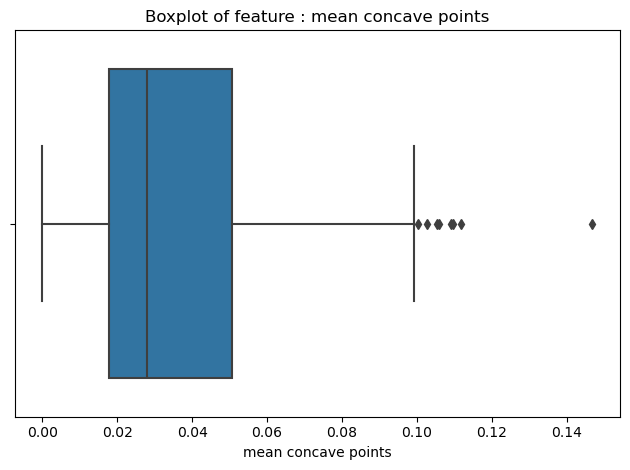

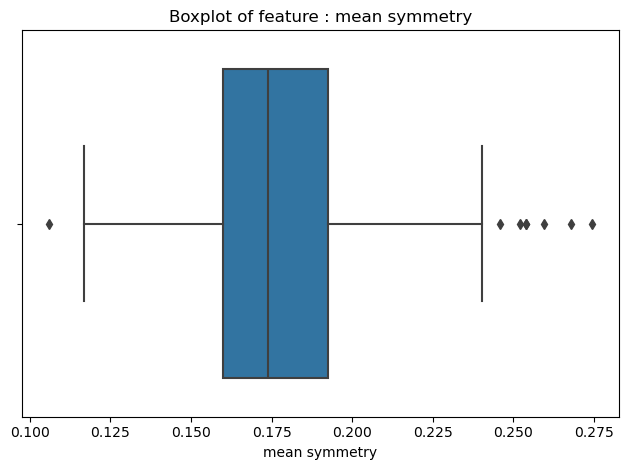

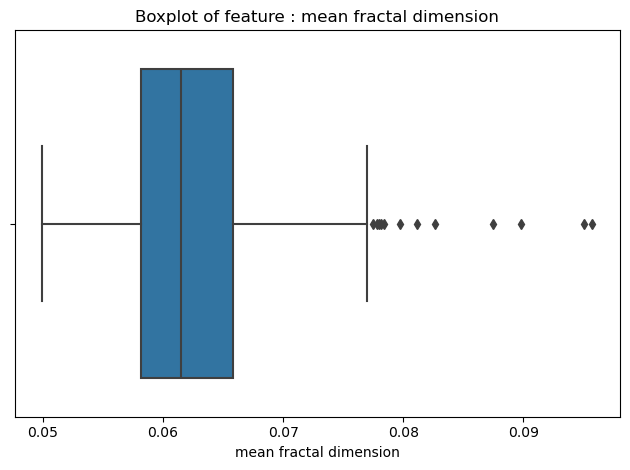

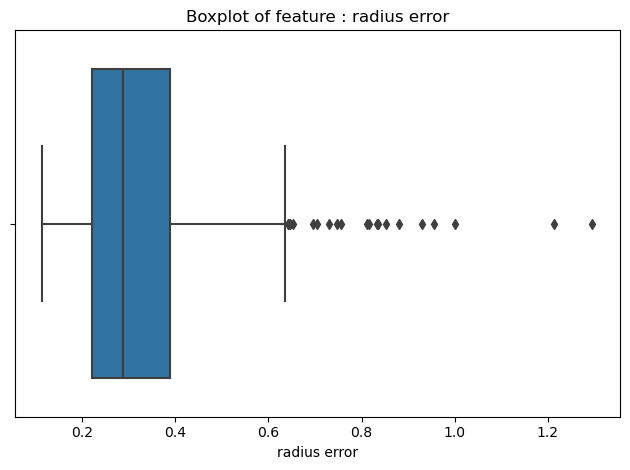

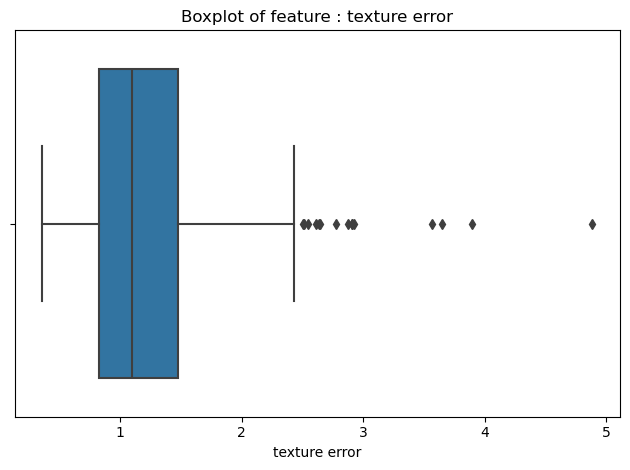

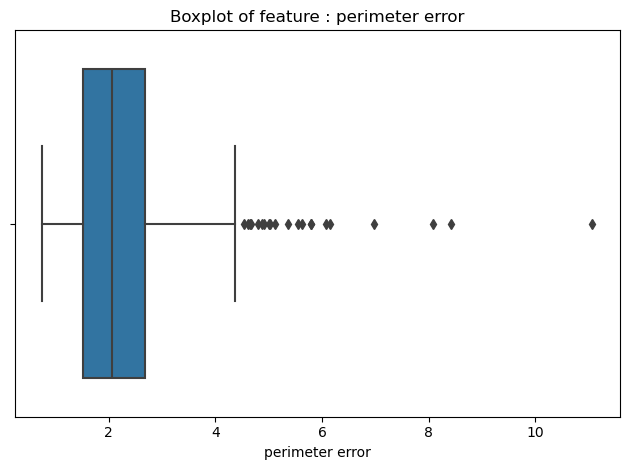

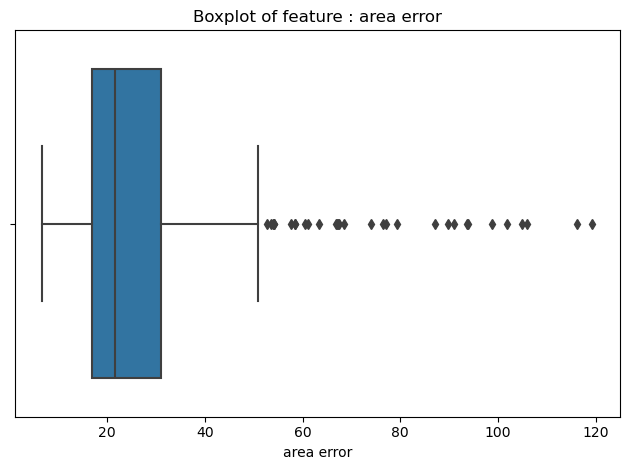

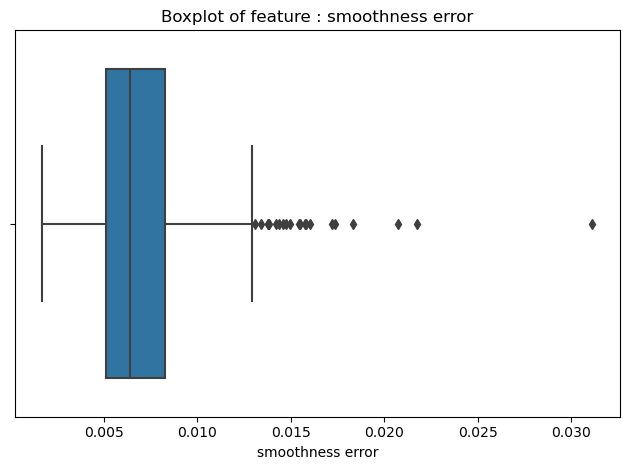

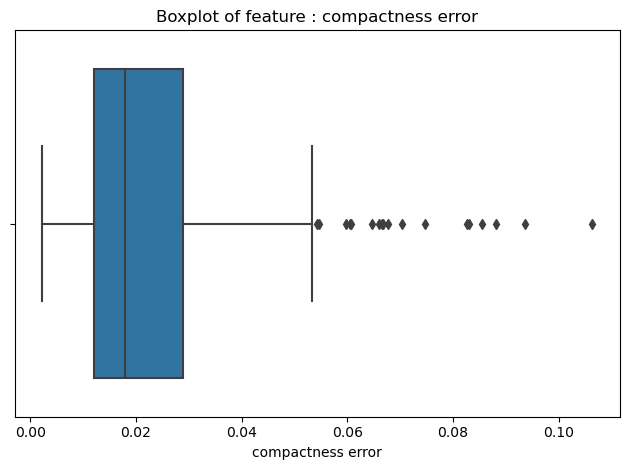

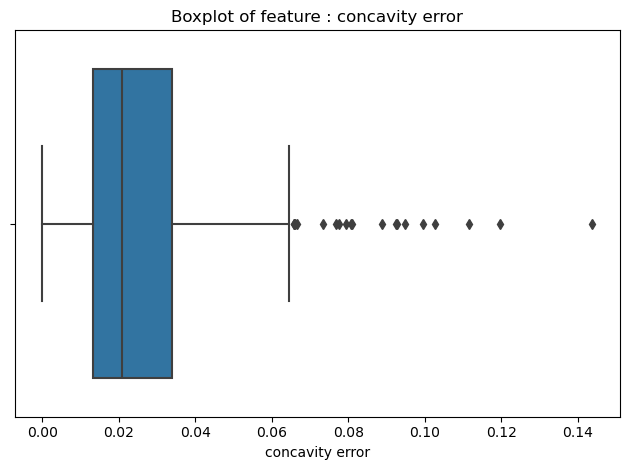

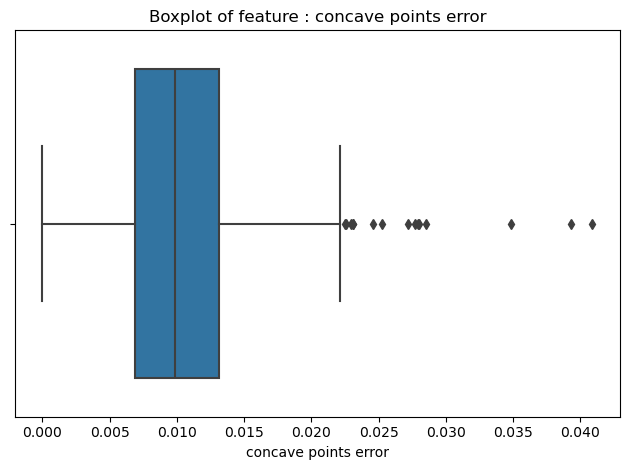

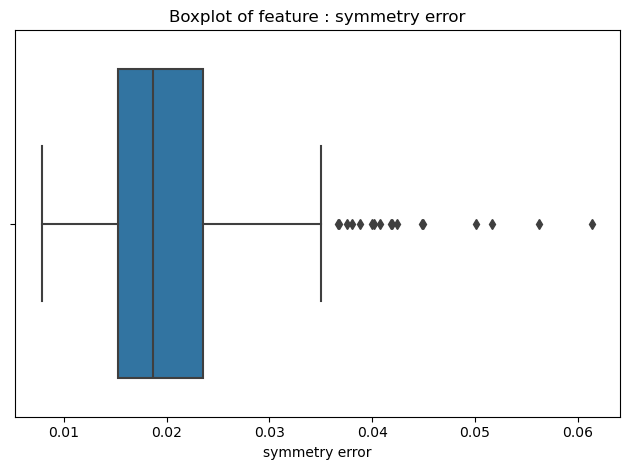

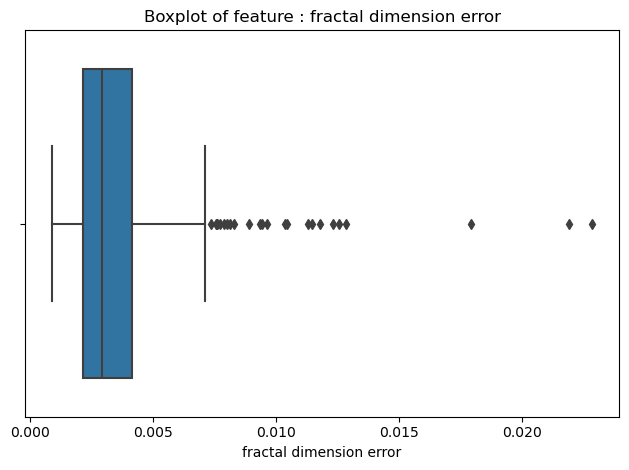

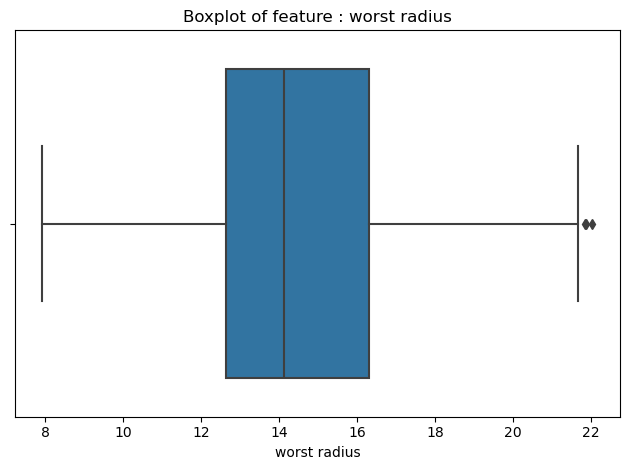

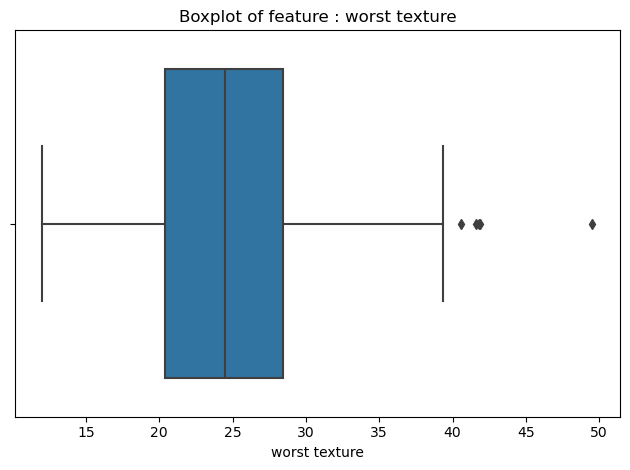

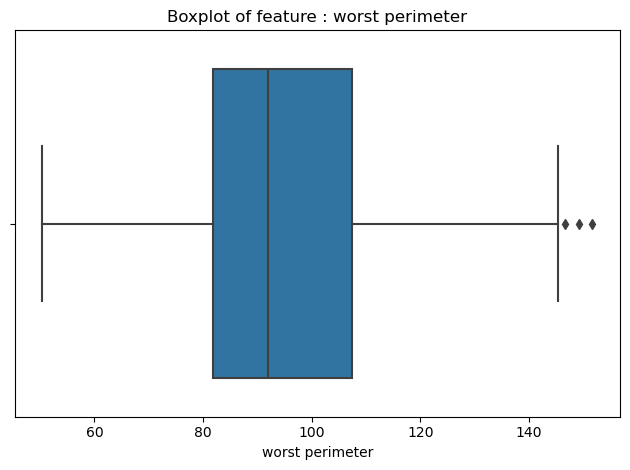

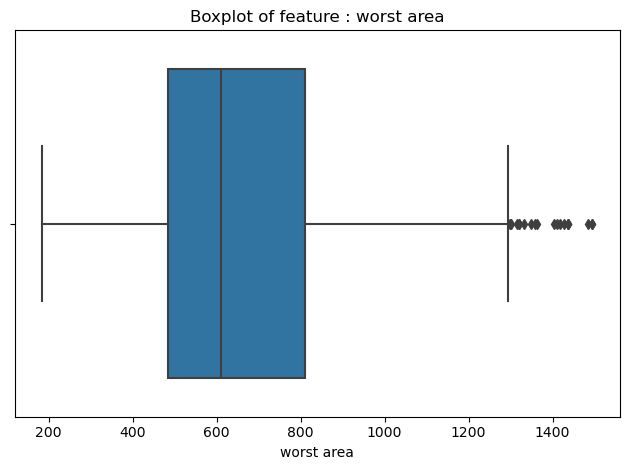

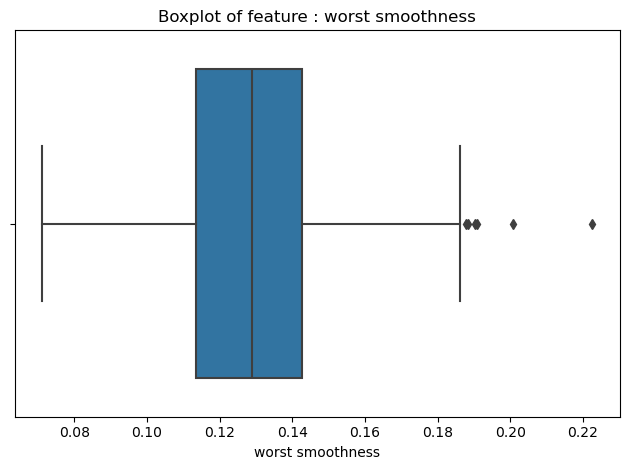

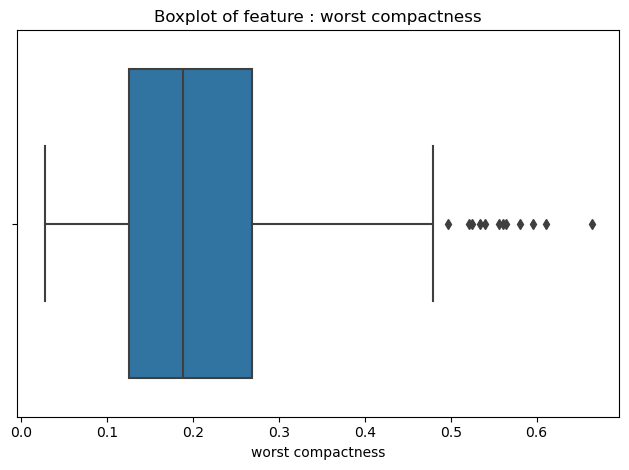

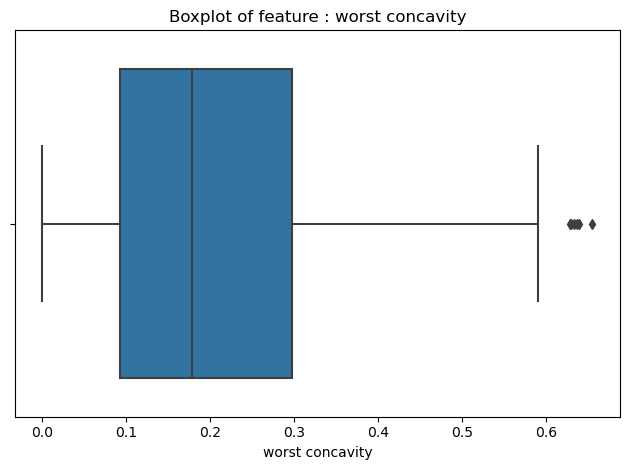

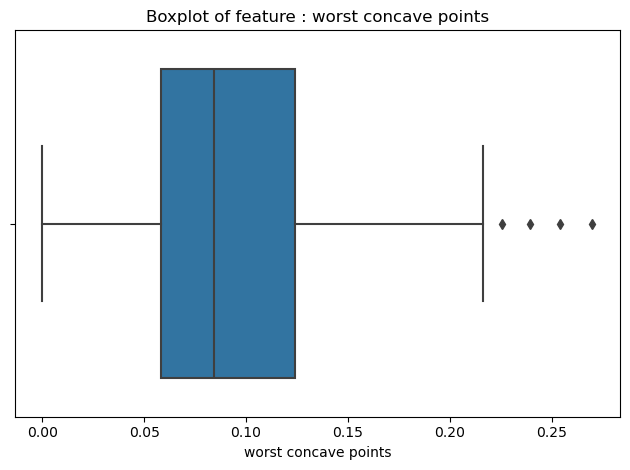

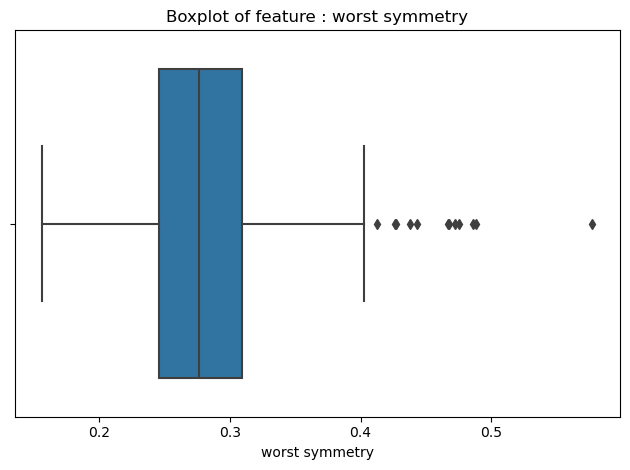

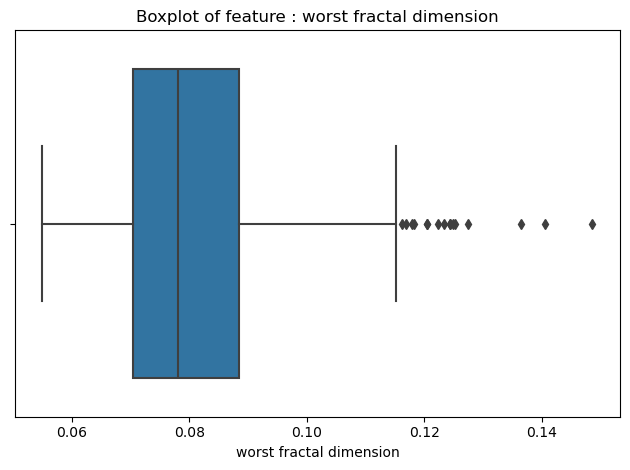

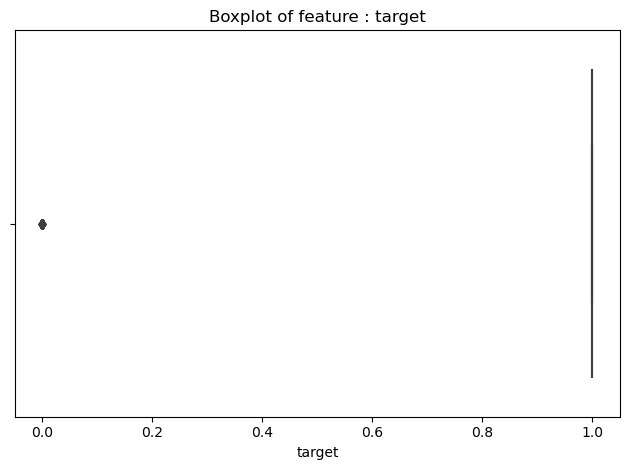

In [38]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "loan_status":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

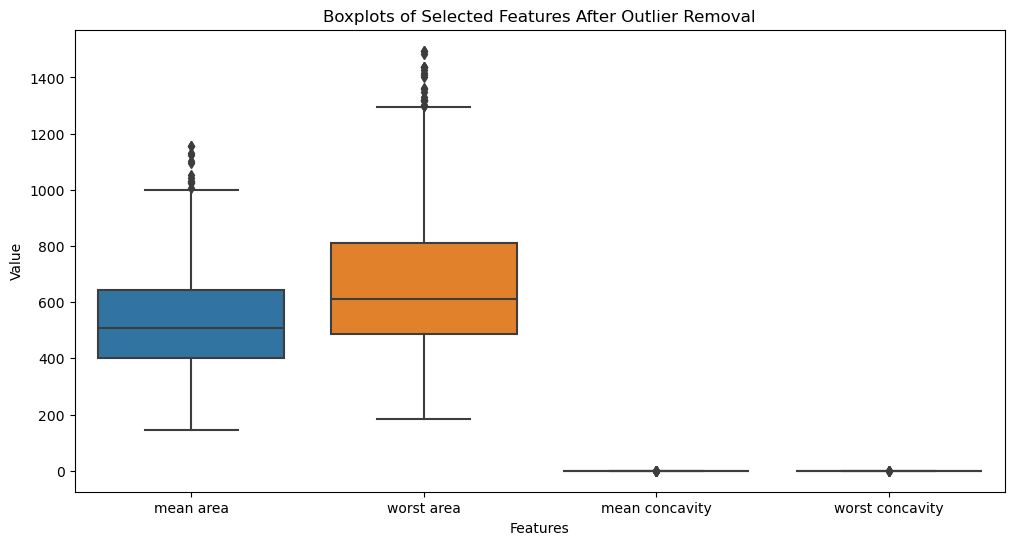

In [41]:
# Plot boxplots for the cleaned features
columns_to_check = ['mean area', 'worst area', 'mean concavity', 'worst concavity']

plt.figure(figsize=(12, 6))
sns.boxplot(data=tdf[columns_to_check])
plt.title('Boxplots of Selected Features After Outlier Removal')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()


#Almost outliers are removed from the columns

In [42]:
tdf.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   459.000000    459.000000      459.000000   459.000000   
mean     12.962678     18.650240       83.772876   534.028322   
std       2.311101      4.086886       15.722194   194.313029   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.455000     15.700000       73.560000   402.800000   
50%      12.830000     18.220000       82.570000   506.900000   
75%      14.420000     20.975000       93.915000   641.850000   
max      19.400000     33.810000      132.400000  1157.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       459.000000        459.000000      459.000000           459.000000   
mean          0.094535          0.089476        0.061026             0.035442   
std           0.013836          0.039511        0.049425             0.025420   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.084610          0.059700        0.025030             0.017915   
50%           0.093840          0.080660        0.045480             0.028000   
75%           0.103100          0.113650        0.087970             0.050715   
max           0.163400          0.245800        0.223600             0.146900   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     459.000000              459.000000  ...     459.000000   
mean        0.176876                0.062523  ...      24.791525   
std         0.024901                0.006412  ...       5.884971   
min         0.106000                0.049960  ...      12.020000   
25%         0.159950                0.058145  ...      20.400000   
50%         0.173900                0.061470  ...      24.490000   
75%         0.192600                0.065795  ...      28.455000   
max         0.274300                0.095750  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       459.000000   459.000000        459.000000         459.000000   
mean         95.285054   675.998257          0.129398           0.212926   
std          20.223162   278.487578          0.022273           0.116130   
min          50.410000   185.200000          0.071170           0.027290   
25%          81.870000   485.400000          0.113450           0.126150   
50%          91.880000   610.200000          0.128900           0.187900   
75%         107.450000   809.450000          0.142550           0.269150   
max         151.700000  1495.000000          0.222600           0.664300   

       worst concavity  worst concave points  worst symmetry  \
count       459.000000            459.000000      459.000000   
mean          0.206743              0.093223        0.280949   
std           0.148068              0.051149        0.053384   
min           0.000000              0.000000        0.156500   
25%           0.092765              0.058315        0.245450   
50%           0.178600              0.084110        0.276200   
75%           0.297700              0.123850        0.309000   
max           0.655600              0.270100        0.577400   

       worst fractal dimension      target  
count               459.000000  459.000000  
mean                  0.081172    0.764706  
std                   0.014911    0.424645  
min                   0.055040    0.000000  
25%                   0.070380    1.000000  
50%                   0.078100    1.000000  
75%                   0.088450    1.000000  
max                   0.148600    1.000000  

[8 rows x 31 columns]

In [43]:
tdf.shape

(459, 31)

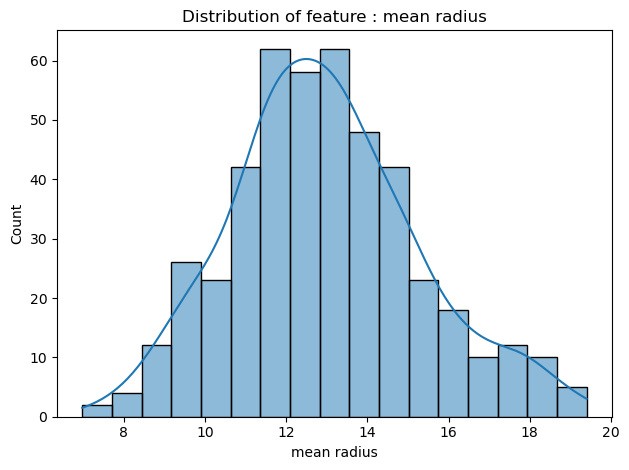

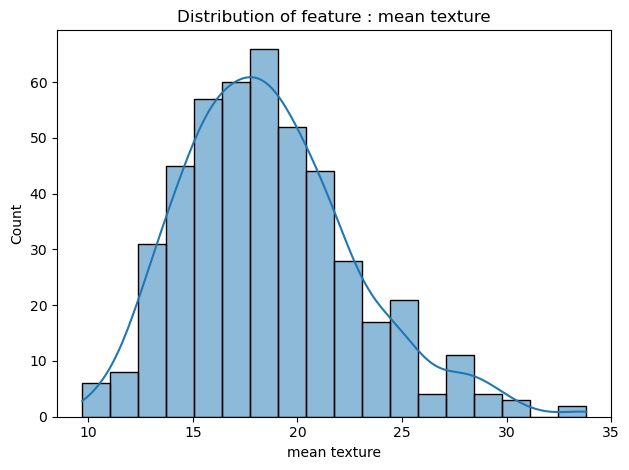

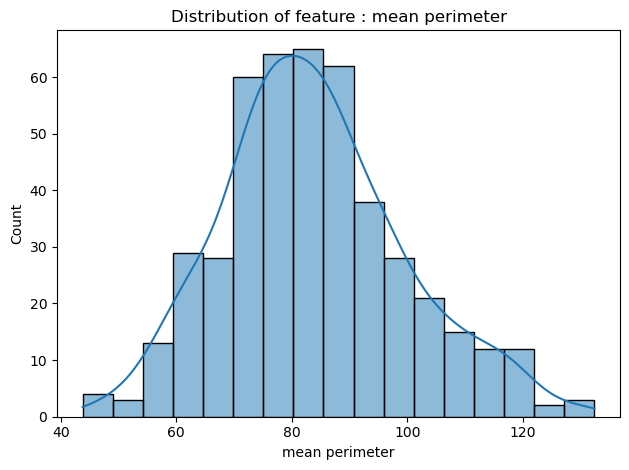

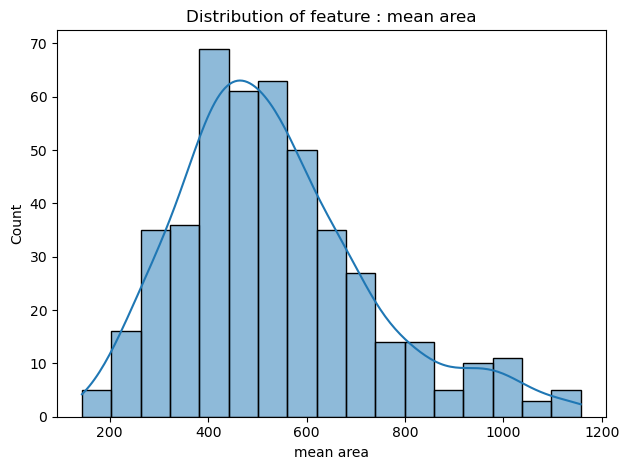

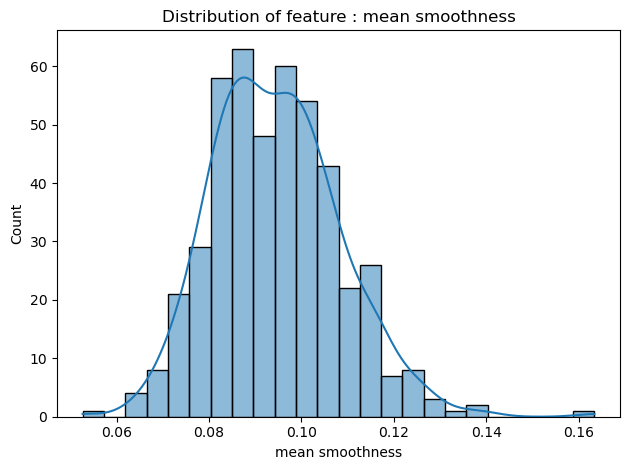

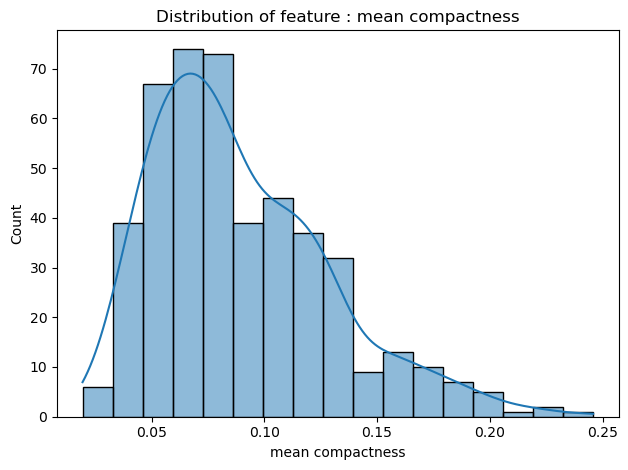

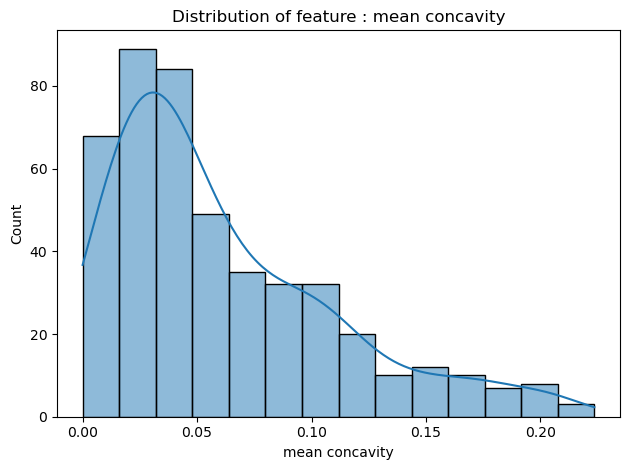

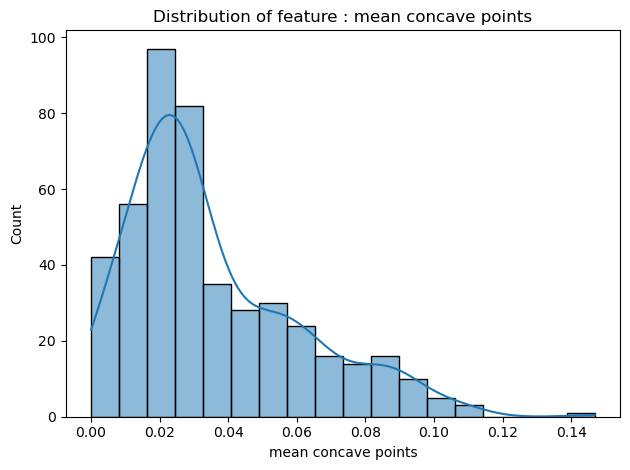

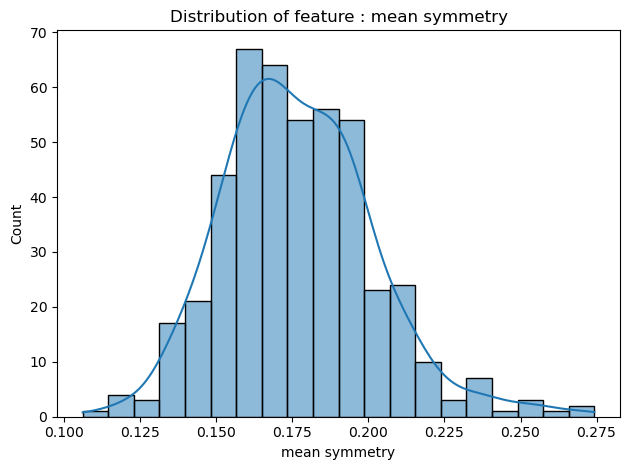

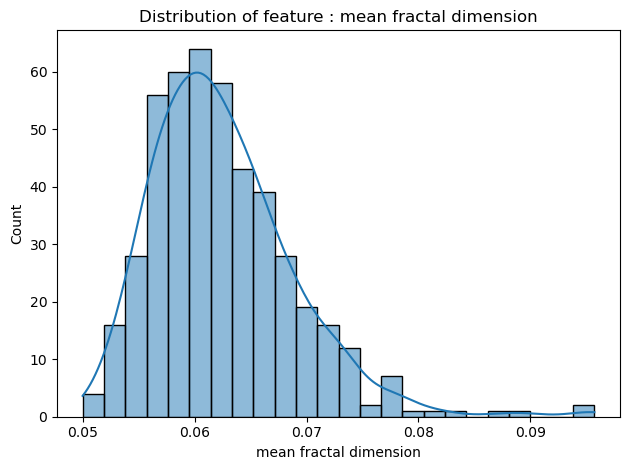

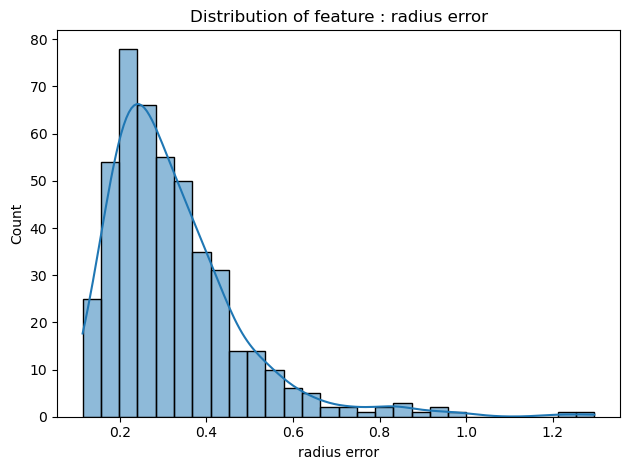

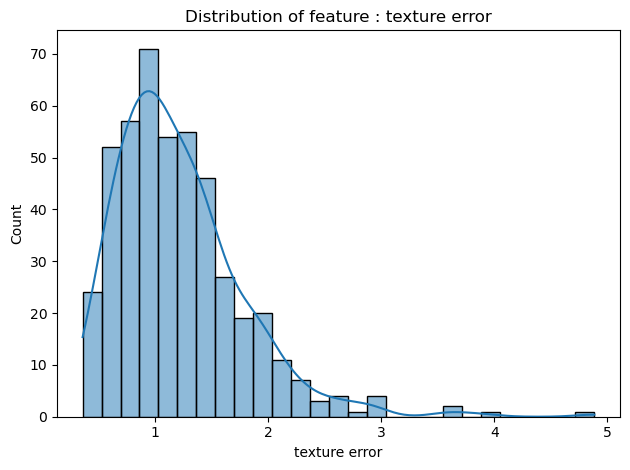

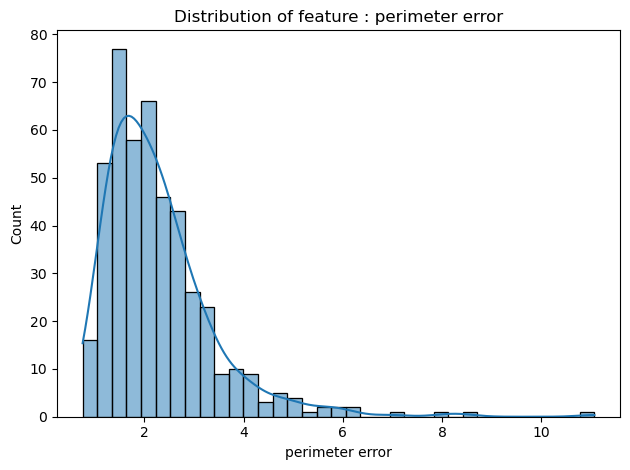

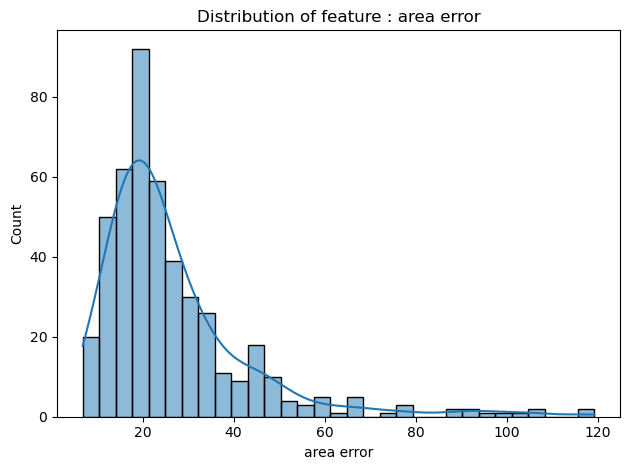

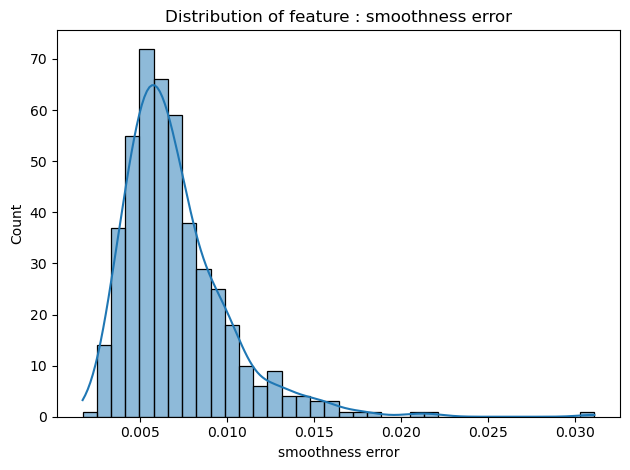

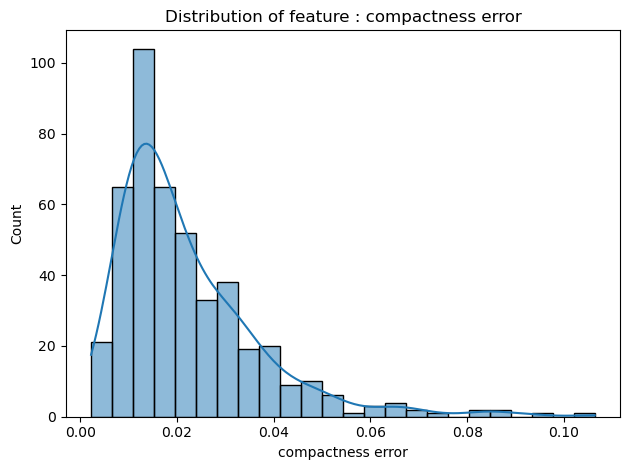

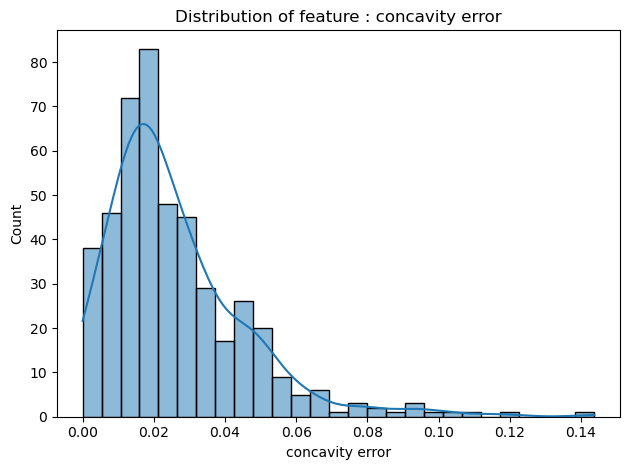

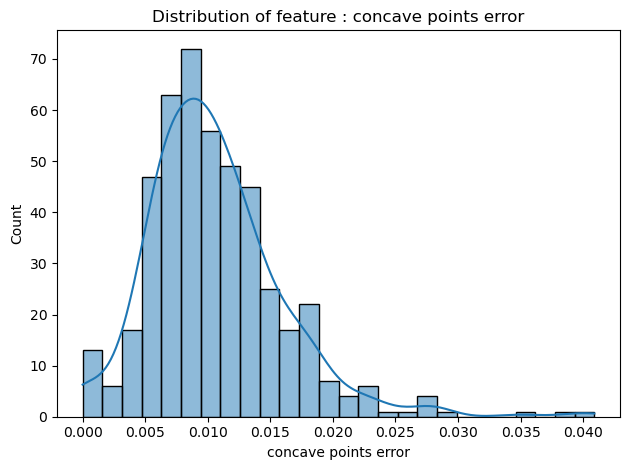

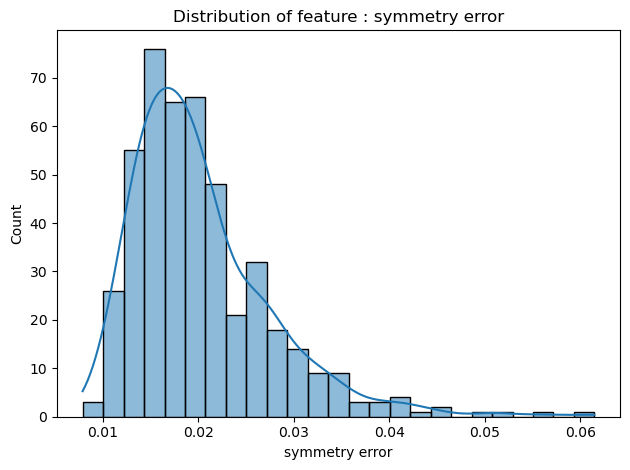

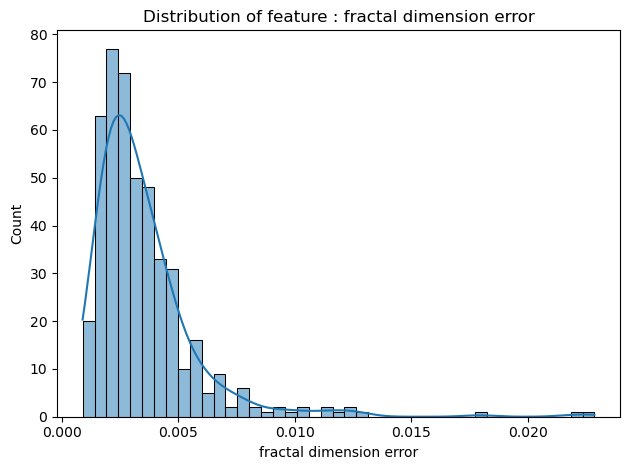

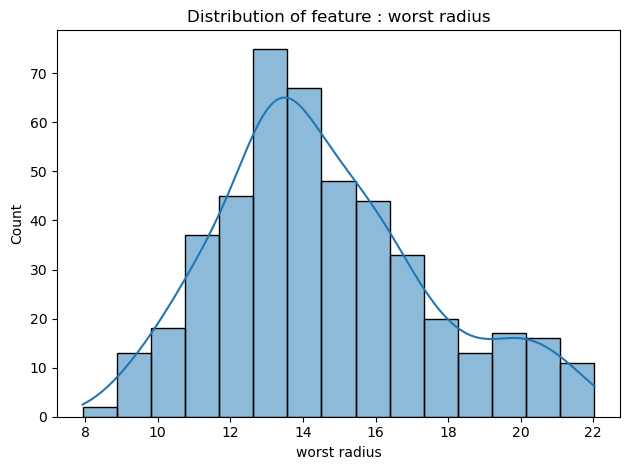

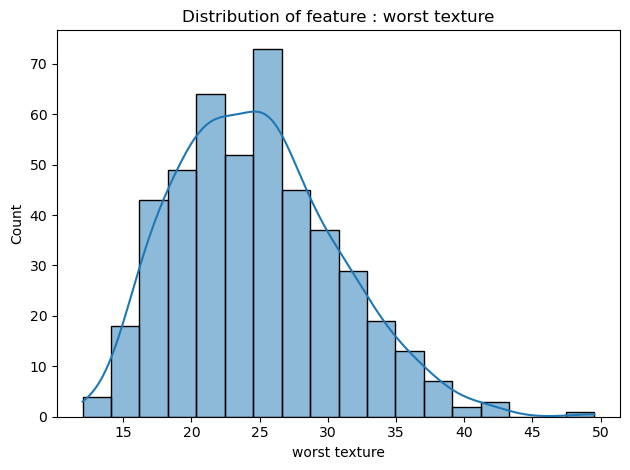

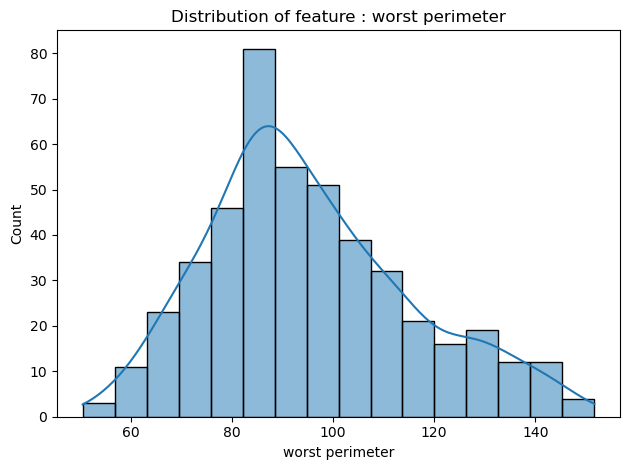

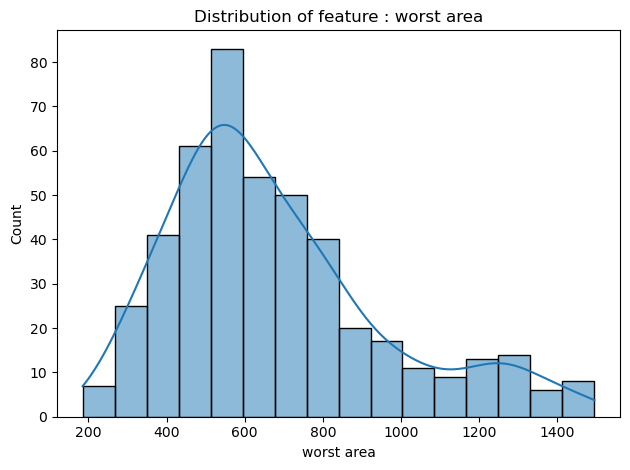

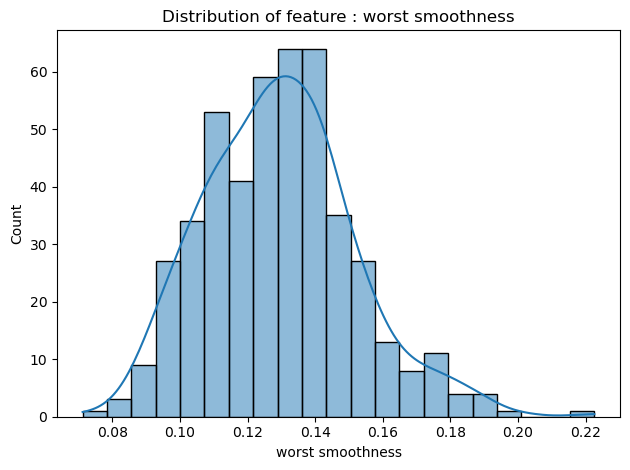

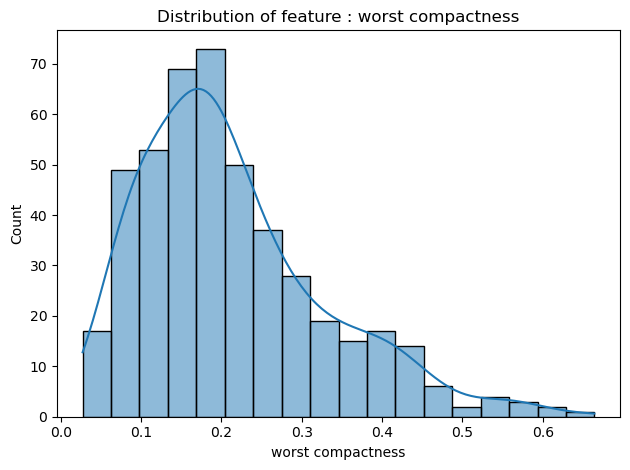

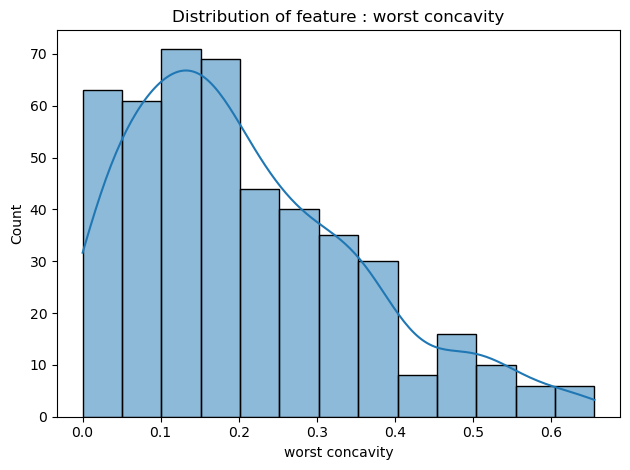

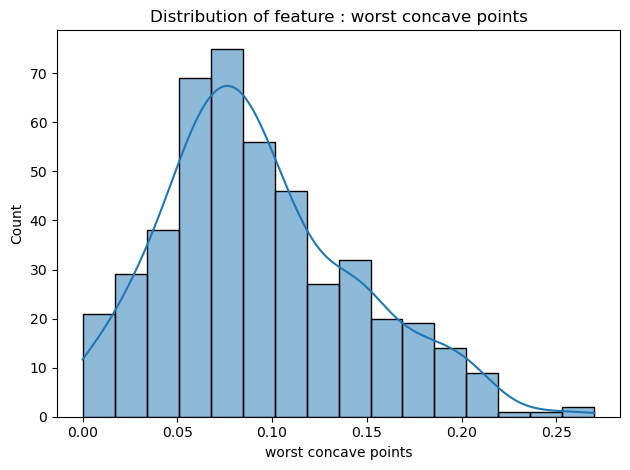

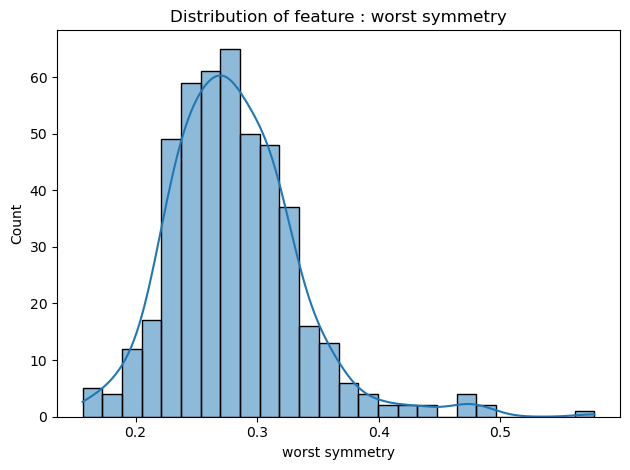

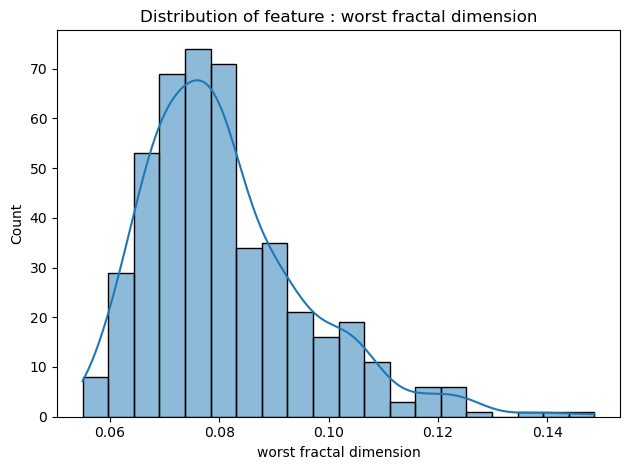

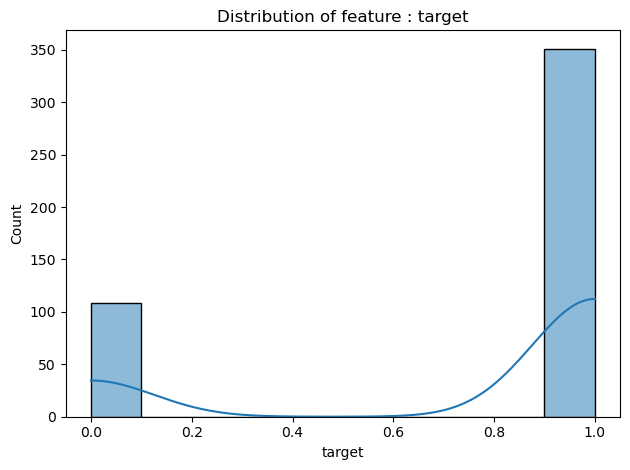

In [44]:
# draw histplot for every numerical column to see distrubution of data after outlier trim dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    sns.histplot(data=tdf, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

# Encoding

In [47]:
tdf.reset_index(drop=True, inplace=True) # reset df index

In [48]:
tdf.info() # show data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              459 non-null    float64
 1   mean texture             459 non-null    float64
 2   mean perimeter           459 non-null    float64
 3   mean area                459 non-null    float64
 4   mean smoothness          459 non-null    float64
 5   mean compactness         459 non-null    float64
 6   mean concavity           459 non-null    float64
 7   mean concave points      459 non-null    float64
 8   mean symmetry            459 non-null    float64
 9   mean fractal dimension   459 non-null    float64
 10  radius error             459 non-null    float64
 11  texture error            459 non-null    float64
 12  perimeter error          459 non-null    float64
 13  area error               459 non-null    float64
 14  smoothness error         4

# Here is no need of encoding because no categorical data found.

# 6. Feature Selection

Common Methods for Feature Selection

Filter Methods:

   Statistical Tests: 
  Use statistical tests to evaluate the relationship between each feature and the target variable (e.g., chi-square test for       categorical features, ANOVA for continuous features).
Correlation Coefficient: 
        Calculate the correlation matrix and select features with a high correlation to the target variable while removing highly correlated features among themselves.

Wrapper Methods,Embedded Methods are using ML algorithms.




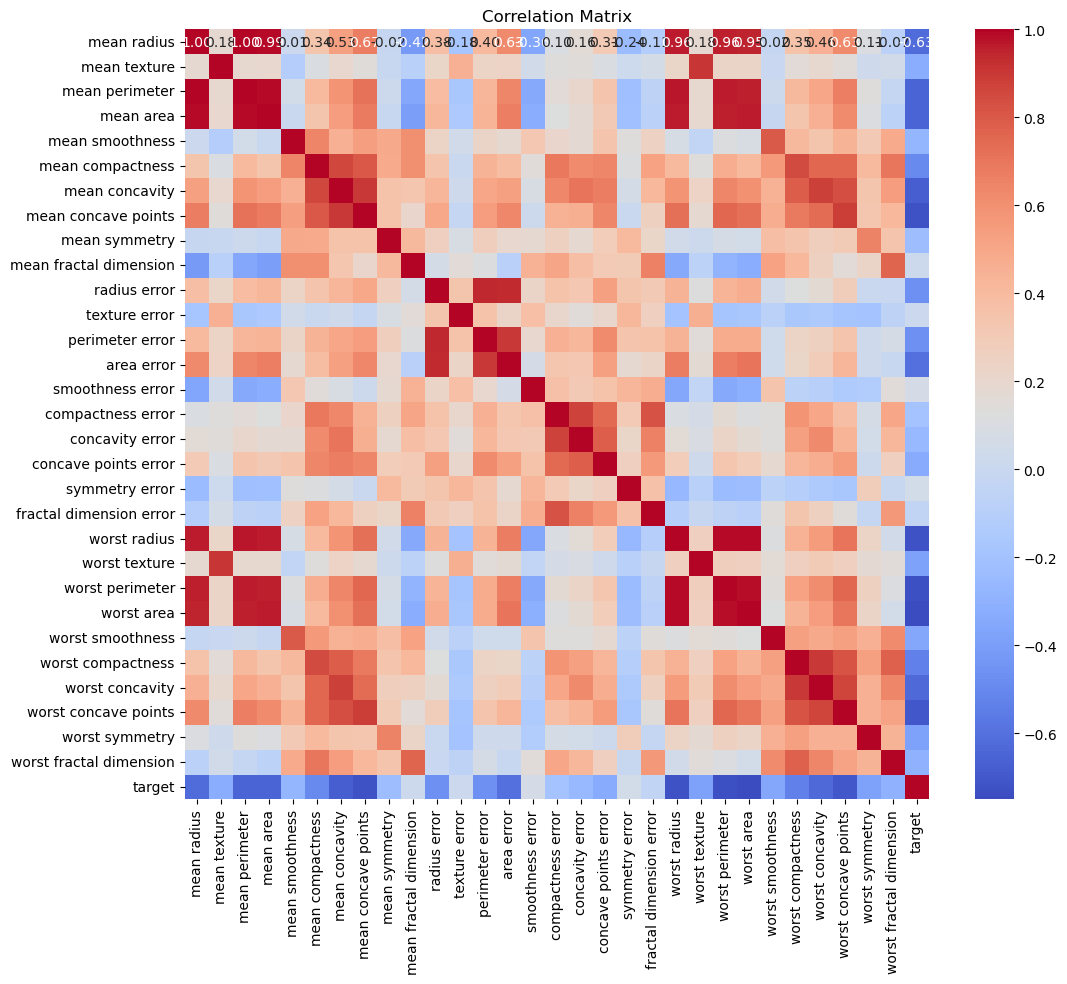

Selected Features using RFE:
['mean radius', 'mean compactness', 'mean concavity', 'mean concave points', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
Accuracy of the model using selected features: 0.95


In [57]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Separate features x and target y
X =tdf.drop('target', axis=1)
y =tdf['target']

# 1. Filter Method: Correlation
correlation_matrix = tdf.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [59]:
# 2. Wrapper Method: Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Create a DataFrame to display feature ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()

print("Selected Features using RFE:")
print(selected_features)

# 3. Train a model using selected features
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model using selected features: {accuracy:.2f}')

Selected Features using RFE:
['mean radius', 'mean compactness', 'mean concavity', 'mean concave points', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
Accuracy of the model using selected features: 0.95


From the 33 of columns or featyures we selected 10 features as x

# 7. Scaling

Scaling is a preprocessing technique used in data preparation for machine learning and statistical analysis. The main purpose of scaling is to standardize the range of independent variables or features in the dataset. Here’s a deeper dive into what scaling is, why it is important, and the different methods used for scaling:

What is Scaling?
Scaling involves transforming the features in a dataset so that they have specific properties, such as a consistent range or distribution. This process helps to ensure that each feature contributes equally to the analysis and modeling process.

Why is Scaling Important?
Equal Contribution: Features with larger magnitudes can disproportionately influence the results of certain algorithms. Scaling ensures that each feature contributes equally to the model.

Improved Model Performance: Many machine learning algorithms converge faster and perform better when the data is scaled. For instance, gradient descent-based algorithms (like linear regression, logistic regression, and neural networks) often require feature scaling to optimize the weights effectively.

Distance-based Algorithms: Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) rely on distance calculations. If features are on different scales, the distance metrics can become misleading.

Assumption of Normality: Some statistical techniques assume that the data is normally distributed. Scaling can help to meet this assumption and improve the effectiveness of the analysis.

Common Scaling Techniques
Min-Max Scaling (Normalization):
 
Range: Scales the data to a fixed range, typically [0, 1].
Use Case: Useful for algorithms that require bounded input values, such as neural networks.

Standardization (Z-score Scaling):

Characteristics: Centers the data around the mean (0) and scales it to have a standard deviation of 1.
Use Case: Suitable for algorithms that assume normally distributed data, such as linear regression.
Robust Scaling:

IQR

Characteristics: Uses the median and the interquartile range (IQR) to scale features, making it robust to outliers.
Use Case: Effective when the data contains outliers that cannot be removed.
Conclusion
Scaling is a crucial step in the data preprocessing pipeline, especially when working with machine learning algorithms sensitive to feature magnitudes or distances. By applying the appropriate scaling technique, you can improve the performance of your models and ensure more accurate and reliable results.








In [60]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform X_test
X_test_scaled = scaler.transform(X_test)



Here’s what happens:

scaler.fit(X_train): Computes the mean and standard deviation (or other statistics, depending on the scaler) on the training data.
scaler.transform(X_train): Applies the scaling transformation to X_train based on the computed statistics.
scaler.transform(X_test): Applies the same transformation to X_test using the mean and standard deviation calculated from X_train.

No Scaling on y_train and y_test (for Classification):

In classification problems, you usually don’t scale the target variable (y). The target is often categorical (e.g., 0 or 1 for binary classification), and scaling doesn't apply to these kinds of values.

So here is no need of scaling y features beacuse target variables are 0/1

# ML Algorithms

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Logistic Regression
Description:
Logistic Regression is a linear model used for binary classification problems. It models the probability that a given input belongs to a particular class using the logistic (sigmoid) function.
It calculates the relationship between the features and the probability of the target class.
Why it's suitable:
Logistic Regression is simple, fast, and interpretable. It performs well when the relationship between the features and the target is approximately linear.


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=10000)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate accuracy
accuracy_log1 = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log1:.4f}")


Logistic Regression Accuracy: 0.9457


# 2. Decision Tree Classifier

good in classification also work in regression . Ensamble techniqe.

Description:

A Decision Tree is a tree-like structure where each internal node represents a "test" on a feature, each branch represents the outcome of the test, and each leaf node represents a class label. 
The algorithm recursively splits the dataset based on feature values to create a tree structure.

Why it's suitable:

Decision Trees are simple to understand and interpret. They can capture non-linear relationships between features and the target variable. They also don’t require scaling of features and can handle both categorical and numerical data.

It is particularly powerful for both classification and regression tasks.

When to Use Each
Use a Decision Tree Classifier when you want to classify instances into categories (e.g., cancer diagnosis).
Use a Decision Tree Regressor when you want to predict a continuous numerical outcome (e.g., predicting the price of a house).


In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")


Decision Tree Classifier Accuracy: 0.9239


# 3. Random Forest Classifier

The Random Forest Classifier is an ensemble machine learning algorithm that builds multiple decision trees and combines their results to make more accurate and robust predictions. It is particularly powerful for both classification and regression tasks.

How Random Forest Works:
Multiple Decision Trees:

A Random Forest is essentially a collection (or "forest") of multiple decision trees. Each tree is trained on a random subset of the data.
For a classification task, each decision tree in the forest makes its own prediction (i.e., predicts a class label).
Bootstrap Aggregation (Bagging):

Random Forest uses a technique called bagging, where it trains each tree on a randomly sampled subset of the training data. Some samples may be repeated, while others are excluded (this is known as bootstrapping).
This helps reduce variance and prevents overfitting, making the Random Forest more robust compared to individual decision trees.
Random Feature Selection:

At each node of the tree, only a random subset of features is considered for splitting, rather than all features. This ensures that each tree is different and reduces the correlation between trees, which improves generalization.
Voting:

For classification, after all trees in the forest make their predictions, the Random Forest performs a majority vote to decide the final class label (i.e., the class that most trees predicted).
For regression, it takes the average of the predictions.

Key Parameters:

n_estimators=100: The number of decision trees in the forest. More trees typically lead to better performance, but there is a trade-off with computation time.

random_state=42: Controls the randomness for reproducibility.

max_features: The number of features to consider when splitting a node. Setting it to a lower value (e.g., sqrt or log2) reduces correlation between trees and improves model robustness.

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

Random Forest Classifier Accuracy: 0.9457


# 4. Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. It is particularly well-suited for binary classification problems but can also be extended to handle multi-class classification.

Much good for classification problem in ML.

Key Parameters:

kernel='linear': Specifies the type of kernel to use. For linearly separable data, a linear kernel is appropriate. For non-linear data, kernels like 'rbf', 'poly', or 'sigmoid' can be used.
C (Regularization Parameter): Controls the trade-off between maximizing the margin and minimizing the classification error. A large C tries to classify all training examples correctly (risking overfitting), while a small C allows for more misclassifications (increasing generalization).
gamma (for non-linear kernels like RBF): Defines how far the influence of a single training example reaches. A large gamma means that points close to the margin have a stronger influence, potentially leading to overfitting.



In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model (with a linear kernel for simplicity)
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")

Support Vector Machine Accuracy: 0.9674


# 5. k-Nearest Neighbors (k-NN)

The k-Nearest Neighbors (k-NN) algorithm is one of the simplest and most intuitive machine learning algorithms used for both classification and regression tasks. It is a non-parametric and lazy learning algorithm, meaning it makes no assumptions about the underlying data distribution and doesn't learn a model during training. Instead, it makes predictions based on the closest data points in the feature space.

How k-NN Works:
Distance-Based Voting:

In classification, k-NN works by identifying the k-nearest neighbors to a given test point, based on a distance metric (usually Euclidean distance).
The algorithm then votes on the class of the test point by considering the majority class among the k-nearest neighbors.
Choosing the Value of k:

The number of neighbors (k) is a hyperparameter that must be set before running the algorithm.
A small value of k (e.g., 1) makes the algorithm sensitive to noise (overfitting), while a large value of k can lead to a more generalized decision boundary (potentially underfitting).
A common practice is to choose k based on cross-validation to find the optimal value.
Distance Metrics:

The most common distance metric used in k-NN is Euclidean distance, but other metrics like Manhattan distance or Minkowski distance can also be used.
For categorical variables, the Hamming distance is often used.



Key Parameters:
n_neighbors=5: The number of neighbors to use (i.e., the value of k). The default is 5, but it can be optimized using cross-validation.
weights='uniform' or 'distance': Determines whether each neighbor contributes equally to the prediction ('uniform') or whether closer neighbors have more influence ('distance').
metric='euclidean': The distance metric used to find the neighbors. Alternatives include 'manhattan', 'minkowski', and more.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")


k-Nearest Neighbors Accuracy: 0.9348


# Step 4: Summary of Results / Model Comparison


In [70]:
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")
print(f"k-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

Logistic Regression Accuracy: 0.9457
Decision Tree Classifier Accuracy: 0.9239
Random Forest Classifier Accuracy: 0.9457
Support Vector Machine Accuracy: 0.9674
k-Nearest Neighbors Accuracy: 0.9348


# The classification_report function in scikit-learn provides a detailed report on the precision, recall, F1-score, and support for each class in your dataset. You can use it after making predictions with a classification model.



In [74]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.95      0.99      0.97        73

    accuracy                           0.95        92
   macro avg       0.94      0.89      0.91        92
weighted avg       0.95      0.95      0.94        92



Precision: The proportion of correctly predicted positive observations to total predicted positives.
Recall (Sensitivity): The proportion of correctly predicted positive observations to all actual positives.
F1-score: The weighted average of precision and recall, useful for balancing precision and recall.
Support: The number of occurrences of each class in the test dataset.
This report helps you analyze how well your model is performing for each class, especially in the case of imbalanced datasets.


Interpretation:
0 ("cancerous"):

Precision: 0.94: When the model predicts a tumor is malignant, it is correct 95% of the time.
Recall: 0.79: The model correctly identifies 91% of the actual malignant cases. It misses 9% (false negatives).
F1-Score: 0.86: A balance between precision and recall, meaning the model is doing a good job at identifying malignant cases without making too many errors.
Support: 19: There are 42 malignant cases in the test dataset.

1 ("non-cancerous"):

Precision: 0.95: When the model predicts a tumor is benign, it is correct 97% of the time.
Recall: 0.99: The model correctly identifies 98% of the actual benign cases.
F1-Score: 0.97: The model is slightly better at identifying benign cases than malignant ones.
Support: 73: There are 73 benign cases in the test dataset.
Overall Accuracy:



In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}\n")


Logistic Regression:
  Accuracy: 0.9737
  Precision: 0.9722
  Recall: 0.9859
  F1 Score: 0.9790
  ROC AUC: 0.9974

Decision Tree Classifier:
  Accuracy: 0.9474
  Precision: 0.9577
  Recall: 0.9577
  F1 Score: 0.9577
  ROC AUC: 0.9440

Random Forest Classifier:
  Accuracy: 0.9649
  Precision: 0.9589
  Recall: 0.9859
  F1 Score: 0.9722
  ROC AUC: 0.9953

Support Vector Machine:
  Accuracy: 0.9825
  Precision: 0.9726
  Recall: 1.0000
  F1 Score: 0.9861
  ROC AUC: 0.9974

k-Nearest Neighbors:
  Accuracy: 0.9474
  Precision: 0.9577
  Recall: 0.9577
  F1 Score: 0.9577
  ROC AUC: 0.9820

